# **Load data dari Google Drive**
Inisialisasi data set dilakukan menggunakan google drive, sialhkan mendownload folder dataset pada link dibawah.

Link Data Set: https://drive.google.com/drive/folders/1UrN0sm8H3R_7vK4UxMb-H9N6rWBRprOE?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Data
data = pd.read_excel('WA_Fn-UseC_-Telco-Customer-Churn.xlsx', engine='openpyxl')

In [ ]:
pd.set_option('display.max_colwidth', None)

Langkah:

Membaca dataset dari file CSV yang tersimpan di Google Drive.

Data dibaca menggunakan pandas.read_csv().

Tujuan:

Mengambil data mentah untuk selanjutnya dilakukan tahapan pembersihan dan transformasi.

# **Exploratory Data Analysis (EDA)**

In [ ]:
data.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# 1 Statistik Deskriptif
print("\nStatistik Deskriptif:")
data.describe(include='all')


Statistik Deskriptif:


customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7043   7043    7043.000000    7043       7043  7043.000000   
unique        7043      2            NaN       2          2          NaN   
top     3186-AJIEK   Male            NaN      No         No          NaN   
freq             1   3555            NaN    3641       4933          NaN   
mean           NaN    NaN       0.162147     NaN        NaN    32.371149   
std            NaN    NaN       0.368612     NaN        NaN    24.559481   
min            NaN    NaN       0.000000     NaN        NaN     0.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity  ...  \
count          7043          7043            7043           7043  ...   
unique            2             3               3              3  ...   
top             Yes            No     Fiber optic             No  ...   
freq           6361          3390            3096           3498  ...   
mean            NaN           NaN             NaN            NaN  ...   
std             NaN           NaN             NaN            NaN  ...   
min             NaN           NaN             NaN            NaN  ...   
25%             NaN           NaN             NaN            NaN  ...   
50%             NaN           NaN             NaN            NaN  ...   
75%             NaN           NaN             NaN            NaN  ...   
max             NaN           NaN             NaN            NaN  ...   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7043        7043        7043            7043   
unique                3           3           3               3   
top                  No          No          No              No   
freq               3095        3473        2810            2785   
mean                NaN         NaN         NaN             NaN   
std                 NaN         NaN         NaN             NaN   
min                 NaN         NaN         NaN             NaN   
25%                 NaN         NaN         NaN             NaN   
50%                 NaN         NaN         NaN             NaN   
75%                 NaN         NaN         NaN             NaN   
max                 NaN         NaN         NaN             NaN   

              Contract PaperlessBilling     PaymentMethod MonthlyCharges  \
count             7043             7043              7043    7043.000000   
unique               3                2                 4            NaN   
top     Month-to-month              Yes  Electronic check            NaN   
freq              3875             4171              2365            NaN   
mean               NaN              NaN               NaN      64.761692   
std                NaN              NaN               NaN      30.090047   
min                NaN              NaN               NaN      18.250000   
25%                NaN              NaN               NaN      35.500000   
50%                NaN              NaN               NaN      70.350000   
75%                NaN              NaN               NaN      89.850000   
max                NaN              NaN               NaN     118.750000   

        TotalCharges Churn  
count           7043  7043  
unique          6531     2  
top                     No  
freq              11  5174  
mean             NaN   NaN  
std              NaN   NaN  
min              NaN   NaN  
25%              NaN   NaN  
50%              NaN   NaN  
75%              NaN   NaN  
max              NaN   NaN  

[11 rows x 21 columns]

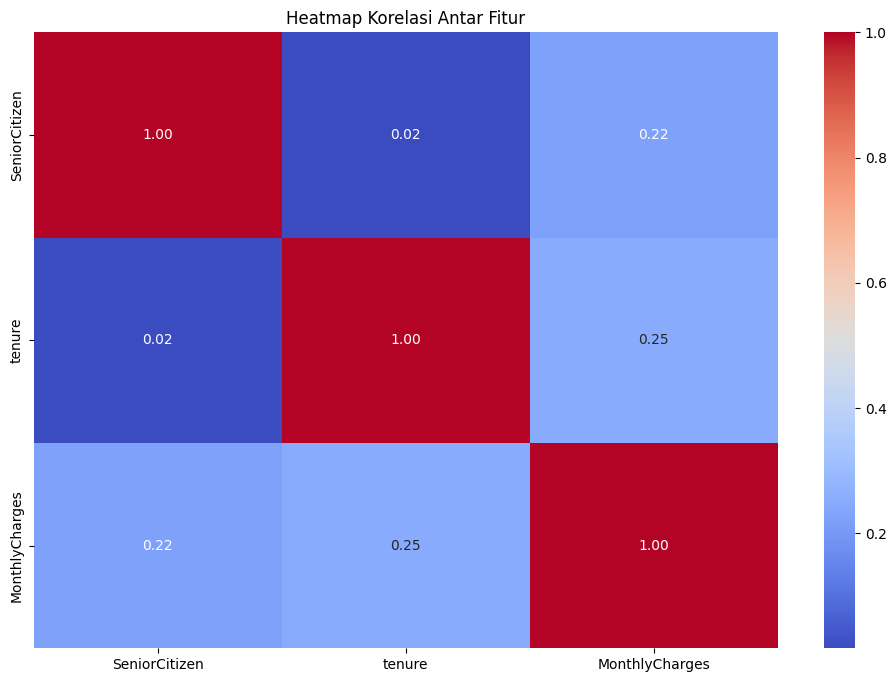

In [ ]:
# 2 Korelasi antar Fitur
plt.figure(figsize=(12,8))

# Drop kolom non-numerik sebelum mencari korelasi
numeric_data = data.select_dtypes(include=['number'])
correlation = numeric_data.corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

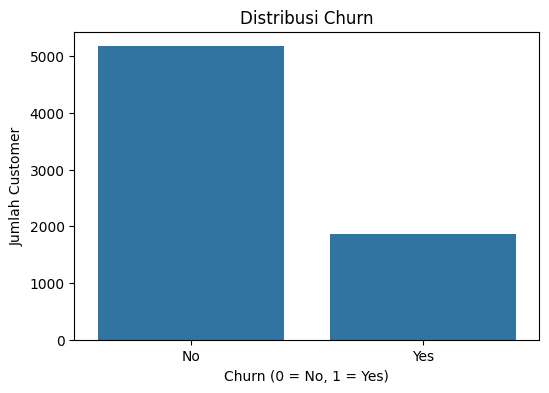

In [ ]:
# 3 Distribusi Churn
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=data)
plt.title('Distribusi Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Jumlah Customer')
plt.show()

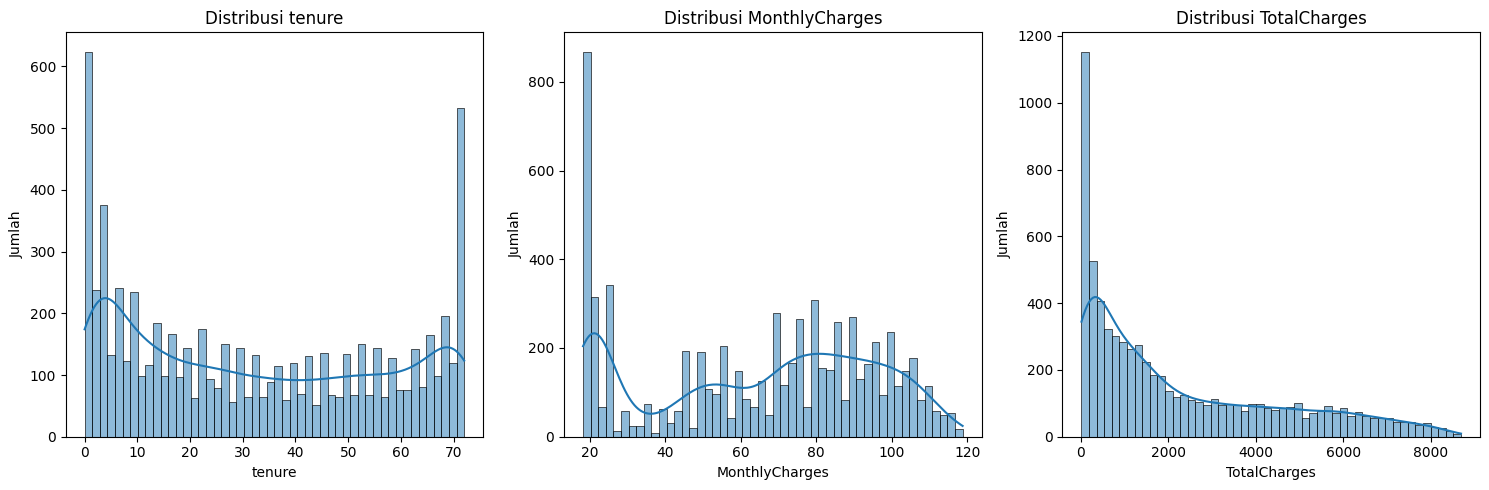

In [ ]:
# 4 Distribusi Fitur Numerik
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a figure with subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each numeric feature
for idx, feature in enumerate(numeric_features):
    # Handle potential non-numeric data in TotalCharges
    data[feature] = pd.to_numeric(data[feature], errors='coerce')
    sns.histplot(data[feature].dropna(), kde=True, bins=50, ax=axes[idx])
    axes[idx].set_title(f'Distribusi {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Jumlah')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

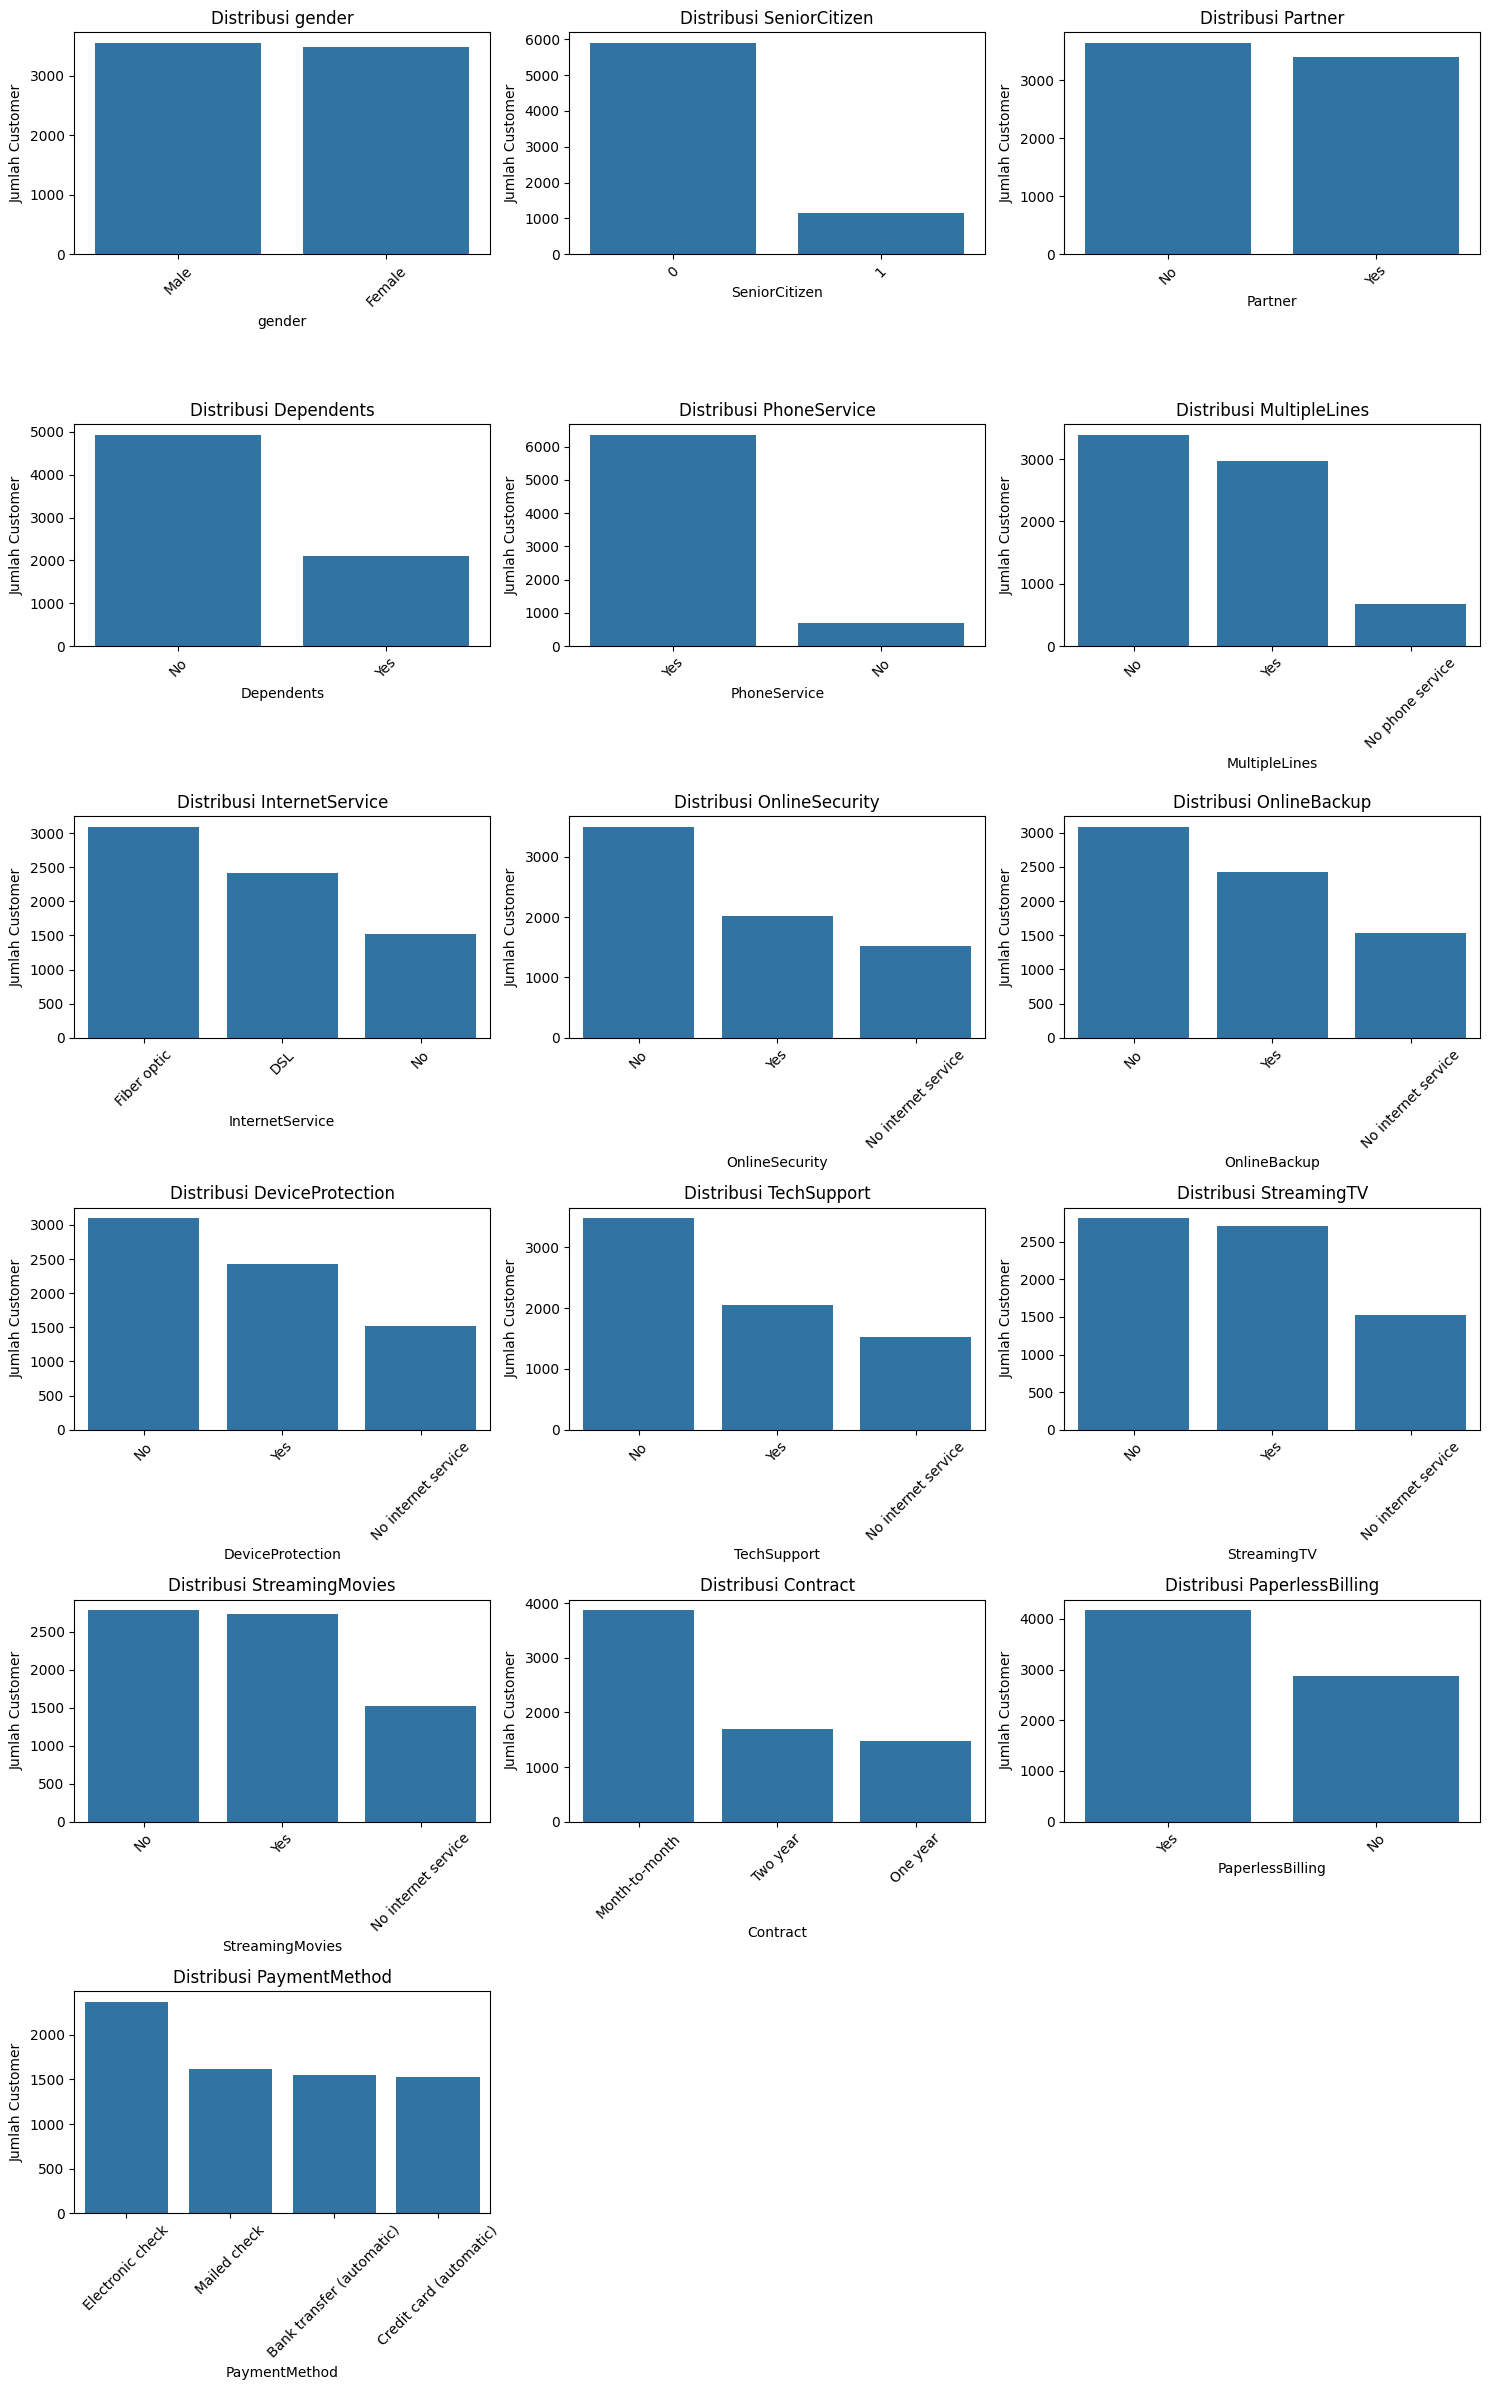

In [ ]:
# 5 Visualisasi Fitur Kategorikal
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                        'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

# Calculate the number of rows and columns for the subplot grid
n_features = len(categorical_features)
n_cols = 3  # Adjust the number of columns as needed
n_rows = int(np.ceil(n_features / n_cols))  # Calculate rows needed

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Plot each categorical feature
for idx, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=data, order=data[feature].value_counts().index, ax=axes[idx])
    axes[idx].set_title(f'Distribusi {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Jumlah Customer')
    axes[idx].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for idx in range(len(categorical_features), len(axes)):
    axes[idx].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Data Pre-Processing



## **Data Cleaning**

In [ ]:
import pandas as pd
import numpy as np

# Check data types
print("Data types:")
print(data.dtypes)

# If columns are strings, clean and convert
if data['MonthlyCharges'].dtype == 'object':
    data['MonthlyCharges'] = data['MonthlyCharges'].str.replace(',', '.')
    data['MonthlyCharges'] = data['MonthlyCharges'].astype(float)

if data['TotalCharges'].dtype == 'object':
    data['TotalCharges'] = data['TotalCharges'].str.replace(',', '.')
    data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
    data['TotalCharges'] = data['TotalCharges'].astype(float)

# Check missing values before cleaning
print("Missing values before cleaning:")
print(data.isnull().sum())

# Fill missing values in TotalCharges with median
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Check missing values after cleaning
print("Missing values after cleaning:")
print(data.isnull().sum())

Data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object
Missing values before cleaning:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract 

<ipython-input-11-33c219cedd9a>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


Langkah:

Mengganti tanda koma (,) menjadi titik (.) pada kolom numerik (MonthlyCharges, TotalCharges) agar format angka sesuai.

Membersihkan nilai kosong (' ') di kolom TotalCharges dan menggantinya menjadi NaN.

Mengonversi kolom MonthlyCharges dan TotalCharges menjadi tipe data float.

Mengisi missing values pada TotalCharges dengan nilai median kolom tersebut.

Tujuan:

Menstandarisasi format numerik agar bisa diproses secara matematis.

Menghindari error dalam analisis akibat data yang kosong atau salah format.

## **Data Transform**

In [ ]:
# 2. Data Transformation
# Encode categorical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
    print(data[col])

0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Name: gender, Length: 7043, dtype: int64
0       1
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    1
7042    0
Name: Partner, Length: 7043, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    0
7042    0
Name: Dependents, Length: 7043, dtype: int64
0       0
1       1
2       1
3       0
4       1
       ..
7038    1
7039    1
7040    0
7041    1
7042    1
Name: PhoneService, Length: 7043, dtype: int64
0       1
1       0
2       0
3       1
4       0
       ..
7038    2
7039    2
7040    1
7041    2
7042    0
Name: MultipleLines, Length: 7043, dtype: int64
0       0
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    0
7041    1
7042    1
Name: InternetService, Length: 7043, dtype: int64
0       0
1       2
2       2
3       2
4       0
       ..
7038   

Langkah:

Melakukan encoding terhadap fitur-fitur kategorikal menjadi numerik menggunakan Label Encoding (sklearn.preprocessing.LabelEncoder).

Fitur yang di-encode:

gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, dan Churn.

Tujuan:

Mengubah data kategorikal menjadi angka sehingga dapat digunakan dalam model machine learning atau analisis statistik.

## **Data Reduction**

In [ ]:
# 3. Data Reduction
# Pilih subset kolom yang penting (contoh: hapus customerID karena tidak relevan)
data_reduced = data.drop(columns=['customerID'])
data_reduced.head(10)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   
5       0              0        0           0       8             1   
6       1              0        0           1      22             1   
7       0              0        0           0      10             0   
8       0              0        1           0      28             1   
9       1              0        0           1      62             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   
5              2                1               0             0   
6              2                1               0             2   
7              1                0               2             0   
8              2                1               0             0   
9              0                0               2             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   
5                 2            0            2                2         0   
6                 0            0            2                0         0   
7                 0            0            0                0         0   
8                 2            2            2                2         0   
9                 0            0            0                0         1   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1  
5                 1              2           99.65        820.50      1  
6                 1              1           89.10       1949.40      0  
7                 0              3           29.75        301.90      0  
8                 1              2          104.80       3046.05      1  
9                 0              0           56.15       3487.95      0

Langkah:

Menghapus kolom customerID karena tidak memiliki kontribusi terhadap prediksi (customerID hanya identifier, bukan feature relevan).

Tujuan:

Mengurangi dimensi data dengan membuang kolom yang tidak memiliki nilai analitis.

## **Data Discretization**

In [ ]:
# 4. Data Discretization
# Binning tenure menjadi kategori (contoh: New, Mid, Loyal)

bins = [0, 12, 48, 72]
labels = ['New', 'Mid', 'Loyal']
data_reduced['tenure_group'] = pd.cut(data_reduced['tenure'], bins=bins, labels=labels)

# Encode tenure_group
data_reduced['tenure_group'] = le.fit_transform(data_reduced['tenure_group'])
data_reduced['tenure_group'].head(10)

0    2
1    1
2    2
3    1
4    2
5    2
6    1
7    2
8    1
9    0
Name: tenure_group, dtype: int64

Langkah:

Melakukan pengelompokan (binning) terhadap kolom tenure menjadi kategori:

New: 0–12 bulan

Mid: 13–48 bulan

Loyal: 49–72 bulan

Kemudian hasil binning di-encode menjadi angka menggunakan Label Encoder.

Tujuan:

Mengubah data numerik kontinu menjadi data kategorikal yang bisa mempermudah analisis tertentu.

## **Data Normalization**

In [ ]:
# 5. Data Normalization
# Normalisasi kolom numerik
scaler = MinMaxScaler()
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
data_reduced[numeric_cols] = scaler.fit_transform(data_reduced[numeric_cols])
data_reduced[numeric_cols].head(10)

tenure  MonthlyCharges  TotalCharges
0  0.013889        0.115423      0.001275
1  0.472222        0.385075      0.215867
2  0.027778        0.354229      0.010310
3  0.625000        0.239303      0.210241
4  0.027778        0.521891      0.015330
5  0.111111        0.809950      0.092511
6  0.305556        0.704975      0.222779
7  0.138889        0.114428      0.032668
8  0.388889        0.861194      0.349325
9  0.861111        0.377114      0.400317

Langkah:

Melakukan normalisasi (Min-Max Scaling) terhadap fitur numerik:

tenure, MonthlyCharges, dan TotalCharges.

Skala hasil normalisasi antara 0 dan 1.

Tujuan:

Menyamakan skala data numerik agar setiap fitur memiliki kontribusi yang seimbang dalam model machine learning.

## Handling Outlier

In [ ]:
import numpy as np

# Detect and cap outliers using IQR for numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if col == 'Churn':
        continue
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
    if outliers > 0:
        print(f"Column {col} has {outliers} outliers")
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

Column SeniorCitizen has 1142 outliers
Column PhoneService has 682 outliers


# **Save Data**

In [ ]:
# Final Data
final_data = data_reduced

# Save preprocessed data
final_data.to_csv('preprocessed_data.csv', index=False)

print("\nData preprocessing complete! Output saved to 'preprocessed_data.csv'")


Data preprocessing complete! Output saved to 'preprocessed_data.csv'


In [ ]:
final_data.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0  0.013889             0   
1       1              0        0           0  0.472222             1   
2       1              0        0           0  0.027778             1   
3       1              0        0           0  0.625000             0   
4       0              0        0           0  0.027778             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0              1                0               0             2  ...   
1              0                0               2             0  ...   
2              0                0               2             2  ...   
3              1                0               2             0  ...   
4              0                1               0             0  ...   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            0            0                0         0                 1   
1            0            0                0         1                 0   
2            0            0                0         0                 1   
3            2            0                0         1                 0   
4            0            0                0         0                 1   

   PaymentMethod  MonthlyCharges  TotalCharges  Churn  tenure_group  
0              2        0.115423      0.001275      0             2  
1              3        0.385075      0.215867      0             1  
2              3        0.354229      0.010310      1             2  
3              0        0.239303      0.210241      0             1  
4              2        0.521891      0.015330      1             2  

[5 rows x 21 columns]

Langkah:

Menyimpan dataset yang telah diproses dan dipilih fiturnya ke dalam file baru preprocessed_data.csv.

Tujuan:

Menyimpan hasil akhir dari preprocessing untuk digunakan pada tahap analisis atau modeling berikutnya.

# Build Model

## Decision Tree + Non-Feature Selection

### Part 1: Data Loading and Exploration

In [ ]:
import pandas as pd
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.tree import plot_tree

# Suppress warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Part 1: Data Loading and Exploration
# Create directories if they don't exist
os.makedirs('models', exist_ok=True)
os.makedirs('plots', exist_ok=True)

# Load preprocessed data
try:
    data = pd.read_csv('preprocessed_data.csv')
    print(f"Data loaded successfully with shape: {data.shape}")
except FileNotFoundError:
    print("Error: 'preprocessed_data.csv' not found.")
    exit(1)

# Data exploration
print("\n--- Data exploration ---")
print(f"Dataset shape: {data.shape}")
print(f"Class distribution: {data['Churn'].value_counts().to_dict()}")

Data loaded successfully with shape: (7043, 21)

--- Data exploration ---
Dataset shape: (7043, 21)
Class distribution: {0: 5174, 1: 1869}


### Part 2: Data Splitting

In [ ]:
# Part 2: Data Splitting
# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (5634, 20)
Test set shape: (1409, 20)


### Part 3: Data Augmentation

In [ ]:
# Part 3: Data Augmentation
# Function to handle class imbalance
def balance_data(X, y, method='smote'):
    """Balance dataset using SMOTE"""
    print(f"Balancing data using {method}...")
    sampler = SMOTE(random_state=RANDOM_STATE)
    X_balanced, y_balanced = sampler.fit_resample(X, y)
    print(f"Original class distribution: {pd.Series(y).value_counts().to_dict()}")
    print(f"Balanced class distribution: {pd.Series(y_balanced).value_counts().to_dict()}")
    return X_balanced, y_balanced

# Balance only the training data
X_train_balanced, y_train_balanced = balance_data(X_train, y_train, method='smote')

Balancing data using smote...
Original class distribution: {0: 4139, 1: 1495}
Balanced class distribution: {0: 4139, 1: 4139}


### Part 4: Save Selected Features

In [ ]:
# Part 4: Save Features
# Save all feature names
selected_features = X.columns.tolist()
with open('models/DT_NonFeatureSelection.pkl', 'wb') as f:
    pickle.dump(selected_features, f)
print(f"All features saved: {selected_features}")

All features saved: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'tenure_group']


### Part 5: Model Training

In [ ]:
# Part 5: Model Training
# Define Decision Tree model
dt_model = DecisionTreeClassifier(
    min_samples_split=10,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=RANDOM_STATE
)

# Train the model
print("\n--- Training Decision Tree Model ---")
dt_model.fit(X_train_balanced, y_train_balanced)


--- Training Decision Tree Model ---


DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=4,
                       min_samples_split=10, random_state=42)

In [ ]:
depth = dt_model.get_depth()
print(f"Decision Tree Depth: {depth}")

Decision Tree Depth: 26


### Part 6: Model Evaluation and Metrics

In [ ]:
# Part 6: Model Evaluation and Metrics
# Predictions
y_train_pred = dt_model.predict(X_train_balanced)
y_test_pred = dt_model.predict(X_test)
y_test_prob = dt_model.predict_proba(X_test)[:, 1]

# Calculate metrics
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
gap = abs(train_accuracy - test_accuracy)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Print results
print("\nClassification Report for Decision Tree (Test Set):")
print(classification_report(y_test, y_test_pred))
print(f"Decision Tree Train Accuracy: {train_accuracy:.4f}")
print(f"Decision Tree Test Accuracy: {test_accuracy:.4f}")
print(f"Decision Tree Accuracy Gap: {gap:.4f}")
print(f"Decision Tree ROC AUC: {roc_auc:.4f}")


Classification Report for Decision Tree (Test Set):
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1035
           1       0.50      0.61      0.55       374

    accuracy                           0.73      1409
   macro avg       0.67      0.69      0.68      1409
weighted avg       0.75      0.73      0.74      1409

Decision Tree Train Accuracy: 0.9042
Decision Tree Test Accuracy: 0.7339
Decision Tree Accuracy Gap: 0.1704
Decision Tree ROC AUC: 0.7449


### Part 7: Visualization (Confusion Matrix and Decision Tree)

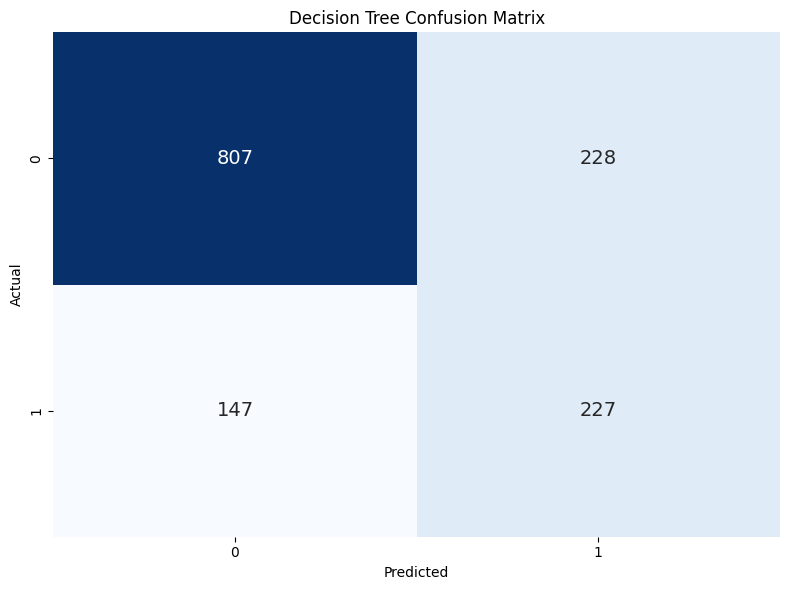

In [ ]:
# Part 7: Visualization (Confusion Matrix and Decision Tree)
# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('plots/DT_NonFeatureSelection_confusion_matrix.png')
plt.show()
plt.close()

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a DOT format
dot_data = export_graphviz(
    dt_model,
    out_file=None,  # Return DOT data as a string
    feature_names=X.columns,
    class_names=['No Churn', 'Churn'],
    filled=True,  # Color nodes based on class
    rounded=True,  # Rounded node corners
    special_characters=True  # Handle special characters
)

# Create a Graphviz source object and set font size
graph = graphviz.Source(dot_data, format='png')
# Optionally set global font size by modifying the DOT source
dot_data = dot_data.replace('node [', 'node [ fontsize=10 ')
graph = graphviz.Source(dot_data, format='png')

# Render and save the visualization
graph.render('plots/DT_NonFeatureSelection_visualization', view=True, cleanup=True)

# Display in Jupyter notebook (if applicable)
graph

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.787422 to fit


### Part 8: Error Analysis

In [ ]:
# Part 8.1: Create Results DataFrame
import pandas as pd

# Create results DataFrame
results_dt = X_test.copy()
results_dt['True Label'] = y_test.map({0: 'No Churn', 1: 'Churn'})
results_dt['Predicted Label'] = y_test_pred
results_dt['Predicted Label'] = results_dt['Predicted Label'].map({0: 'No Churn', 1: 'Churn'})
results_dt['Correct'] = results_dt['True Label'] == results_dt['Predicted Label']

print("\n--- Part 8.1: Results DataFrame Created ---")
print(f"Total samples: {len(results_dt)}")
print(f"Correct predictions: {results_dt['Correct'].sum()}")
print(f"Incorrect predictions: {len(results_dt) - results_dt['Correct'].sum()}")


--- Part 8.1: Results DataFrame Created ---
Total samples: 1409
Correct predictions: 1034
Incorrect predictions: 375


In [ ]:
# Part 8.2: Sample Correct and Incorrect Predictions
# Define display columns (all features in X_test)
display_columns = X_test.columns.tolist()

# Sample correct predictions
correct_dt = results_dt[results_dt['Correct']].sample(
    min(5, len(results_dt[results_dt['Correct']])),
    random_state=RANDOM_STATE
)[display_columns + ['True Label', 'Predicted Label']]

# Sample incorrect predictions
incorrect_samples = results_dt[~results_dt['Correct']]
if len(incorrect_samples) == 0:
    print("\n--- Part 8.2: Sampling Correct and Incorrect Predictions ---")
    print("No incorrect predictions found for Decision Tree. All test samples were classified correctly.")
    incorrect_dt = pd.DataFrame(columns=display_columns + ['True Label', 'Predicted Label'])
else:
    sample_size = min(5, len(incorrect_samples))
    incorrect_dt = incorrect_samples.sample(
        sample_size, random_state=RANDOM_STATE
    )[display_columns + ['True Label', 'Predicted Label']]

In [ ]:
# Display samples
print("\n--- Correct Predictions Sample ---")
correct_dt


--- Correct Predictions Sample ---


gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
2691       0              0        0           0  0.097222             1   
4654       0              0        1           1  0.583333             1   
2558       0              0        0           0  0.527778             1   
907        1              0        0           0  0.263889             1   
2888       0              1        0           1  0.013889             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
2691              0                0               2             0  ...   
4654              0                2               1             1  ...   
2558              0                2               1             1  ...   
907               0                0               0             2  ...   
2888              0                1               0             0  ...   

      StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
2691            0                2         1                 1              2   
4654            1                1         1                 1              2   
2558            1                1         1                 0              3   
907             0                2         1                 1              0   
2888            0                0         0                 1              2   

      MonthlyCharges  TotalCharges  tenure_group  True Label  Predicted Label  
2691        0.406468      0.040440             2    No Churn         No Churn  
4654        0.007960      0.085743             1    No Churn         No Churn  
2558        0.017910      0.076090             1    No Churn         No Churn  
907         0.468657      0.139978             1    No Churn         No Churn  
2888        0.524876      0.006024             2       Churn            Churn  

[5 rows x 22 columns]

In [ ]:
print("\n--- Incorrect Predictions Sample ---")
incorrect_dt


--- Incorrect Predictions Sample ---


gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
5183       0              1        1           1  0.472222             1   
1175       0              0        0           0  0.180556             1   
3362       0              0        0           0  0.013889             1   
1420       0              0        1           0  0.833333             1   
5013       1              1        0           0  0.319444             0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
5183              2                1               0             2  ...   
1175              2                1               2             0  ...   
3362              0                0               2             2  ...   
1420              2                1               0             2  ...   
5013              1                0               0             0  ...   

      StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
5183            0                0         0                 1              3   
1175            0                0         0                 1              1   
3362            0                0         0                 1              2   
1420            2                2         0                 1              2   
5013            0                2         0                 1              0   

      MonthlyCharges  TotalCharges  tenure_group  True Label  Predicted Label  
5183        0.610448      0.311505             1       Churn         No Churn  
1175        0.614428      0.116611             1    No Churn            Churn  
3362        0.364677      0.004166             2       Churn         No Churn  
1420        0.811443      0.688547             0    No Churn            Churn  
5013        0.163184      0.086505             1    No Churn            Churn  

[5 rows x 22 columns]

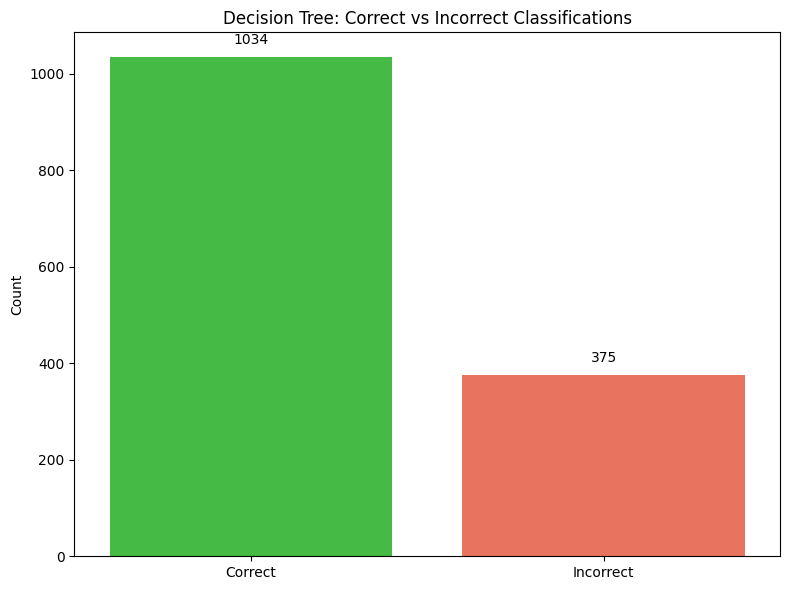


--- Part 8.3: Visualization Complete ---
Bar chart saved to 'plots/DT_NonFeatureSelection_correct_vs_incorrect.png'


In [ ]:
# Part 8.3: Visualize Correct vs. Incorrect Predictions
import seaborn as sns
import matplotlib.pyplot as plt

# Count correct and incorrect predictions
correct_count_dt = results_dt['Correct'].sum()
incorrect_count_dt = len(results_dt) - correct_count_dt

# Plot bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=['Correct', 'Incorrect'], y=[correct_count_dt, incorrect_count_dt], palette=['#32CD32', '#FF6347'])
plt.title('Decision Tree: Correct vs Incorrect Classifications')
plt.ylabel('Count')
for i, count in enumerate([correct_count_dt, incorrect_count_dt]):
    plt.text(i, count + 0.02 * max(correct_count_dt, incorrect_count_dt), str(count), ha='center', va='bottom')
plt.tight_layout()
plt.savefig('plots/DT_NonFeatureSelection_correct_vs_incorrect.png')
plt.show()
plt.close()

print("\n--- Part 8.3: Visualization Complete ---")
print("Bar chart saved to 'plots/DT_NonFeatureSelection_correct_vs_incorrect.png'")

In [ ]:
# Part 8.4: LIME Explanations
import lime
import lime.lime_tabular

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_balanced.values,
    feature_names=X_train_balanced.columns.tolist(),
    class_names=['No Churn', 'Churn'],
    mode='classification',
    random_state=RANDOM_STATE
)

# Function to generate LIME explanation
def explain_instance(instance, model, explainer, num_features=5):
    """Generate LIME explanation for a single instance"""
    exp = explainer.explain_instance(
        data_row=instance,
        predict_fn=model.predict_proba,
        num_features=num_features
    )
    return exp

In [ ]:
import pandas as pd
from tabulate import tabulate

print("\n--- Part 8.4: LIME Explanations ---")
if not correct_dt.empty:
    print("\nLIME Explanation for a Correct Prediction:")
    correct_instance = correct_dt.iloc[0][display_columns].values
    correct_exp = explain_instance(correct_instance, dt_model, explainer)
    correct_exp.save_to_file('plots/DT_NonFeatureSelection_lime_correct.html')
    print("LIME explanation for correct prediction saved to 'plots/DT_NonFeatureSelection_lime_correct.html'")

    # Convert LIME explanation to a table
    explanation_list = correct_exp.as_list()
    # Assuming explanation_list is a list of tuples (feature, weight)
    explanation_df = pd.DataFrame(explanation_list, columns=['Feature', 'Weight'])

    # Display the table using tabulate for a clean text-based output
    print("\nLIME Explanation Table:")
    print(tabulate(explanation_df, headers='keys', tablefmt='psql', showindex=False))
else:
    print("\nNo correct predictions to explain with LIME.")


--- Part 8.4: LIME Explanations ---

LIME Explanation for a Correct Prediction:
LIME explanation for correct prediction saved to 'plots/DT_NonFeatureSelection_lime_correct.html'

LIME Explanation Table:
+-------------------------------+------------+
| Feature                       |     Weight |
|-------------------------------+------------|
| 0.00 < Contract <= 1.00       | -0.113292  |
| 0.27 < MonthlyCharges <= 0.56 | -0.0737192 |
| Dependents <= 0.00            |  0.0693867 |
| 0.07 < tenure <= 0.31         |  0.0535169 |
| InternetService <= 0.00       |  0.0503193 |
+-------------------------------+------------+


In [ ]:
if not incorrect_dt.empty:
    print("\nLIME Explanation for an Incorrect Prediction:")
    incorrect_instance = incorrect_dt.iloc[0][display_columns].values
    incorrect_exp = explain_instance(incorrect_instance, dt_model, explainer)
    incorrect_exp.save_to_file('plots/DT_NonFeatureSelection_lime_incorrect.html')
    print("LIME explanation for incorrect prediction saved to 'plots/DT_NonFeatureSelection_lime_incorrect.html'")

    # Convert LIME explanation to a list for tabulate
    explanation_list = incorrect_exp.as_list()
    table_data = [[exp[0], exp[1]] for exp in explanation_list]

    # Display the table using tabulate
    print("\nLIME Explanation Table:")
    print(tabulate(table_data, headers=["Feature", "Weight"], tablefmt="grid"))
else:
    print("\nNo incorrect predictions to explain with LIME.")


LIME Explanation for an Incorrect Prediction:
LIME explanation for incorrect prediction saved to 'plots/DT_NonFeatureSelection_lime_incorrect.html'

LIME Explanation Table:
+-------------------------------+------------+
| Feature                       |     Weight |
+===============================+============+
| Contract <= 0.00              |  0.263231  |
+-------------------------------+------------+
| 0.31 < tenure <= 0.68         | -0.102263  |
+-------------------------------+------------+
| Dependents > 0.00             | -0.094376  |
+-------------------------------+------------+
| gender <= 0.00                |  0.0573918 |
+-------------------------------+------------+
| 0.56 < MonthlyCharges <= 0.72 |  0.0446843 |
+-------------------------------+------------+


### Part 9: Model Saving

In [ ]:
# Part 8: Model Saving
# Save the model
model_filename = 'models/Decision_Tree_NonFeatureSelection_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(dt_model, f)
print(f"Decision Tree model saved as {model_filename}")

print("\nDecision Tree model optimization completed successfully!")

Decision Tree model saved as models/Decision_Tree_NonFeatureSelection_model.pkl

Decision Tree model optimization completed successfully!


## Naive Bayes + Non-Feature Selection

### Part 1: Data Loading and Exploration

In [ ]:
import pandas as pd
import os
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Create directories if they don't exist
os.makedirs('models', exist_ok=True)
os.makedirs('plots', exist_ok=True)

# Load preprocessed data
try:
    data = pd.read_csv('preprocessed_data.csv')
    print(f"Data loaded successfully with shape: {data.shape}")
except FileNotFoundError:
    print("Error: 'preprocessed_data.csv' not found.")
    exit(1)

# Data exploration
print("\n--- Data exploration ---")
print(f"Dataset shape: {data.shape}")
print(f"Class distribution: {data['Churn'].value_counts().to_dict()}")

# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

Data loaded successfully with shape: (7043, 21)

--- Data exploration ---
Dataset shape: (7043, 21)
Class distribution: {0: 5174, 1: 1869}


### Part 2: Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

### Part 3: Data Augmentation

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Function to handle class imbalance
def balance_data(X, y, method='smote'):
    """Balance dataset using SMOTE"""
    print(f"Balancing data using {method}...")
    sampler = SMOTE(random_state=RANDOM_STATE)
    X_balanced, y_balanced = sampler.fit_resample(X, y)
    print(f"Original class distribution: {pd.Series(y).value_counts().to_dict()}")
    print(f"Balanced class distribution: {pd.Series(y_balanced).value_counts().to_dict()}")
    return X_balanced, y_balanced

# Balance only the training data
X_train_balanced, y_train_balanced = balance_data(X_train, y_train, method='smote')

Balancing data using smote...
Original class distribution: {0: 4139, 1: 1495}
Balanced class distribution: {0: 4139, 1: 4139}


### Part 4: Save Selected Features

In [ ]:
import pickle

# Save all feature names
selected_features = X.columns.tolist()
with open('models/NB_NonFeatureSelection.pkl', 'wb') as f:
    pickle.dump(selected_features, f)
print(f"Saved all feature names: {selected_features}")

Saved all feature names: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'tenure_group']


### Part 5: Model Training

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Define Naive Bayes model
nb_model = GaussianNB()

# Define parameter grid for var_smoothing
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Perform grid search
grid_search = GridSearchCV(
    nb_model, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1
)
print("\n--- Training Naive Bayes Model with Grid Search ---")
grid_search.fit(X_train_balanced, y_train_balanced)

# Best model
nb_model = grid_search.best_estimator_
print(f"Best var_smoothing: {grid_search.best_params_['var_smoothing']}")
print(f"Best cross-validation F1-macro score: {grid_search.best_score_:.4f}")


--- Training Naive Bayes Model with Grid Search ---
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best var_smoothing: 1e-09
Best cross-validation F1-macro score: 0.7564


### Part 6: Model Evaluation and Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Predictions
y_train_pred = nb_model.predict(X_train_balanced)
y_test_pred = nb_model.predict(X_test)
y_test_prob = nb_model.predict_proba(X_test)[:, 1]

# Calculate metrics
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
gap = abs(train_accuracy - test_accuracy)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Print results
print("\nClassification Report for Naive Bayes (Test Set):")
print(classification_report(y_test, y_test_pred))
print(f"Naive Bayes Train Accuracy: {train_accuracy:.4f}")
print(f"Naive Bayes Test Accuracy: {test_accuracy:.4f}")
print(f"Naive Bayes Accuracy Gap also known as Overfitting: {gap:.4f}")
print(f"Naive Bayes ROC AUC: {roc_auc:.4f}")


Classification Report for Naive Bayes (Test Set):
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1035
           1       0.48      0.80      0.60       374

    accuracy                           0.72      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.72      0.73      1409

Naive Bayes Train Accuracy: 0.7596
Naive Bayes Test Accuracy: 0.7154
Naive Bayes Accuracy Gap also known as Overfitting: 0.0442
Naive Bayes ROC AUC: 0.8166


### Part 7: Visualization

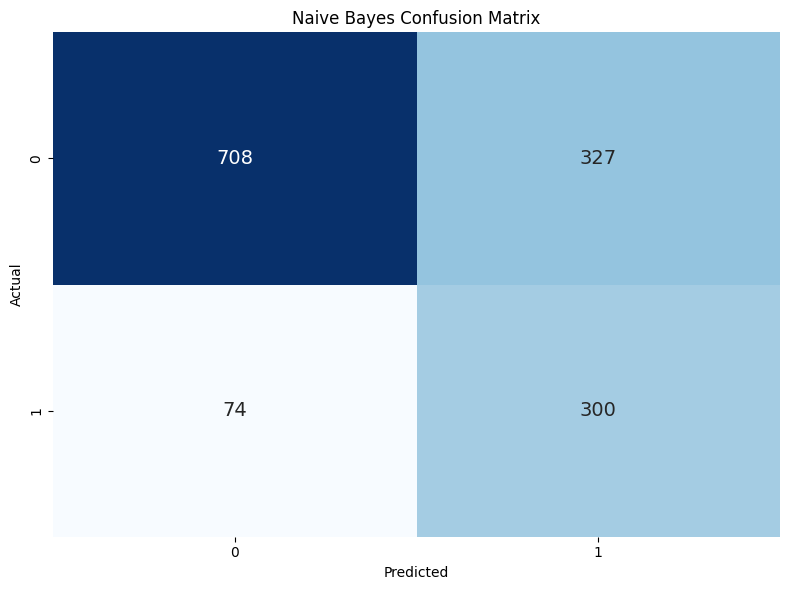

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('plots/NB_NonFeatureSelection_confusion_matrix.png')
plt.show()
plt.close()

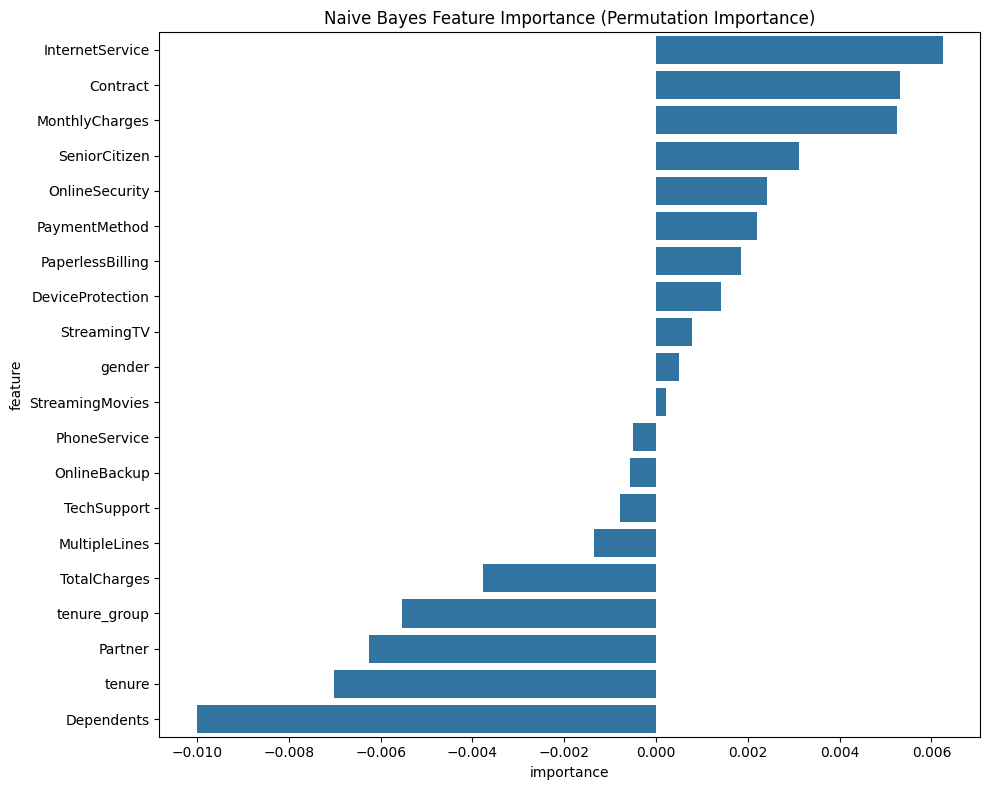

In [ ]:
# Compute permutation importance
perm_importance = permutation_importance(nb_model, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': perm_importance.importances_mean
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(len(X.columns)))
plt.title('Naive Bayes Feature Importance (Permutation Importance)')
plt.tight_layout()
plt.savefig('plots/NB_NonFeatureSelection_importance.png')
plt.show()
plt.close()

### Part 8: Error Analysis

In [ ]:
# Part 8: Error Analysis with LIME

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import lime
import lime.lime_tabular

# Part 8.1: Create Results DataFrame
results_nb = X_test.copy()
results_nb['True Label'] = y_test.map({0: 'No Churn', 1: 'Churn'})
results_nb['Predicted Label'] = y_test_pred
results_nb['Predicted Label'] = results_nb['Predicted Label'].map({0: 'No Churn', 1: 'Churn'})
results_nb['Correct'] = results_nb['True Label'] == results_nb['Predicted Label']

print("\n--- Part 8.1: Results DataFrame Created ---")
print(f"Total samples: {len(results_nb)}")
print(f"Correct predictions: {results_nb['Correct'].sum()}")
print(f"Incorrect predictions: {len(results_nb) - results_nb['Correct'].sum()}")


--- Part 8.1: Results DataFrame Created ---
Total samples: 1409
Correct predictions: 1008
Incorrect predictions: 401


In [ ]:
# Part 8.2: Sample Correct and Incorrect Predictions
display_columns = X_test.columns.tolist()

# Sample correct predictions
correct_nb = results_nb[results_nb['Correct']].sample(
    min(10, len(results_nb[results_nb['Correct']])),
    random_state=RANDOM_STATE
)[display_columns + ['True Label', 'Predicted Label']]

# Sample incorrect predictions
incorrect_samples = results_nb[~results_nb['Correct']]
if len(incorrect_samples) == 0:
    print("\n--- Part 8.2: Sampling Correct and Incorrect Predictions ---")
    print("No incorrect predictions found for Naive Bayes. All test samples were classified correctly.")
    incorrect_nb = pd.DataFrame(columns=display_columns + ['True Label', 'Predicted Label'])
else:
    sample_size = min(50, len(incorrect_samples))
    incorrect_nb = incorrect_samples.sample(
        sample_size, random_state=RANDOM_STATE
    )[display_columns + ['True Label', 'Predicted Label']]

In [ ]:
# Display samples
print("\n--- Correct Predictions Sample ---")
correct_nb


--- Correct Predictions Sample ---


gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
3644       1              0        0           1  0.541667             1   
3081       1              0        0           0  0.055556             1   
2672       1              0        0           0  0.375000             1   
6656       1              0        1           1  0.666667             1   
3991       0              0        0           0  0.055556             1   
1292       0              0        0           0  0.861111             1   
2522       1              0        1           1  0.736111             1   
1546       0              0        0           0  0.833333             1   
6786       0              0        0           0  0.152778             1   
1999       1              0        0           0  0.319444             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
3644              2                2               1             1  ...   
3081              0                1               0             0  ...   
2672              0                2               1             1  ...   
6656              2                2               1             1  ...   
3991              2                1               0             2  ...   
1292              2                0               0             2  ...   
2522              2                0               0             0  ...   
1546              0                2               1             1  ...   
6786              0                0               2             0  ...   
1999              2                1               0             0  ...   

      StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
3644            1                1         2                 0              3   
3081            2                0         0                 0              2   
2672            1                1         1                 0              0   
6656            1                1         2                 0              3   
3991            0                2         0                 1              2   
1292            2                2         2                 0              0   
2522            2                2         1                 1              3   
1546            1                1         2                 0              0   
6786            0                0         0                 0              1   
1999            0                0         0                 1              2   

      MonthlyCharges  TotalCharges  tenure_group  True Label  Predicted Label  
3644        0.067164      0.113726             1    No Churn         No Churn  
3081        0.593035      0.032356             2       Churn            Churn  
2672        0.018408      0.062751             1    No Churn         No Churn  
6656        0.052736      0.133228             1    No Churn         No Churn  
3991        0.748756      0.039626             2       Churn            Churn  
1292        0.659204      0.597092             0    No Churn         No Churn  
2522        0.601990      0.452764             0    No Churn         No Churn  
1546        0.015920      0.128006             0    No Churn         No Churn  
6786        0.301493      0.055643             2       Churn            Churn  
1999        0.564179      0.195205             1       Churn            Churn  

[10 rows x 22 columns]

In [ ]:
print("\n--- Incorrect Predictions Sample ---")
incorrect_nb


--- Incorrect Predictions Sample ---


gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
3064       0              0        0           0  0.291667             1   
6107       1              0        0           0  0.013889             1   
6191       0              1        0           0  0.583333             1   
376        1              0        0           0  0.013889             0   
2674       0              1        0           0  0.055556             1   
5012       0              0        0           0  0.166667             1   
481        0              0        1           0  0.666667             0   
1316       1              0        0           0  0.097222             1   
3448       1              0        1           1  0.055556             1   
6108       1              0        0           0  0.250000             0   
6979       1              0        0           1  0.013889             0   
1583       0              0        1           1  0.083333             1   
4140       0              0        0           0  0.875000             1   
2860       1              1        0           0  0.930556             1   
7          0              0        0           0  0.138889             0   
3240       0              0        1           0  0.750000             1   
5222       0              0        0           0  0.111111             1   
3534       0              0        0           1  0.638889             1   
6393       1              0        0           0  0.361111             1   
2687       1              0        0           0  0.388889             1   
6777       1              0        1           0  0.041667             0   
6140       0              0        0           0  0.041667             1   
3940       1              0        0           0  0.263889             0   
3305       1              1        0           0  0.527778             1   
2280       0              1        0           0  0.111111             1   
6244       1              1        1           0  0.750000             1   
2961       1              0        0           0  0.166667             1   
3202       1              0        0           0  0.013889             1   
6110       0              0        1           0  0.263889             1   
2892       1              0        0           0  0.013889             1   
1477       1              0        1           1  0.847222             1   
3672       0              0        1           0  0.750000             1   
277        1              1        1           0  0.291667             1   
4161       1              1        0           0  0.027778             1   
1567       0              0        1           0  0.138889             1   
5975       1              0        1           1  0.097222             1   
6537       1              0        1           0  0.972222             1   
4223       1              0        0           0  0.041667             1   
4264       0              1        0           0  0.638889             1   
2139       0              0        0           0  0.097222             1   
4443       0              0        0           0  0.013889             1   
3207       0              0        0           0  0.069444             1   
5652       0              0        0           0  0.013889             1   
1014       1              0        1           1  0.250000             1   
519        1              0        0           0  0.166667             1   
2877       0              0        1           1  0.847222             1   
4629       0              0        0           0  0.180556             1   
5270       1              0        0           1  0.555556             1   
4594       0              0        1           1  0.291667             1   
6796       1              0        1           1  0.027778             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
3064              0                1               0  

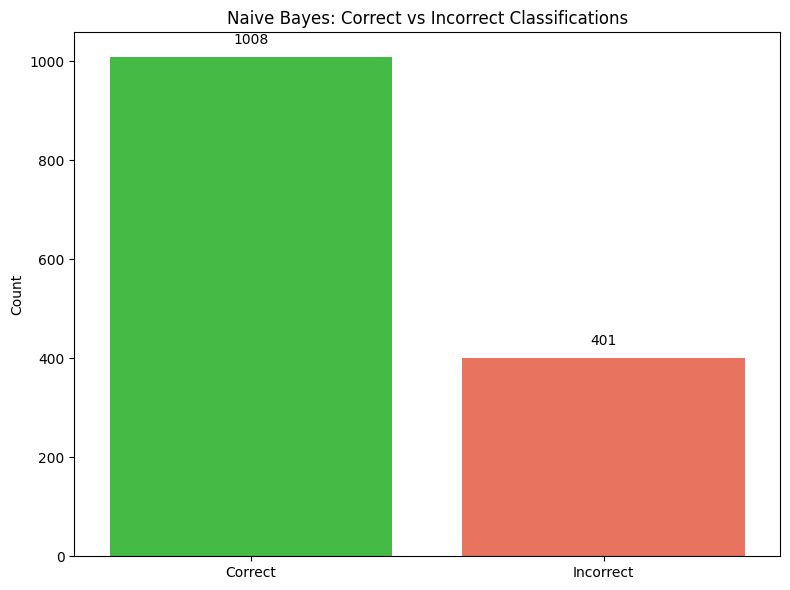


--- Part 8.3: Visualization Complete ---
Bar chart saved to 'plots/NB_NonFeatureSelection_correct_vs_incorrect.png'


In [ ]:
# Part 8.3: Visualize Correct vs. Incorrect Predictions
correct_count_nb = results_nb['Correct'].sum()
incorrect_count_nb = len(results_nb) - correct_count_nb

# Create bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=['Correct', 'Incorrect'], y=[correct_count_nb, incorrect_count_nb], palette=['#32CD32', '#FF6347'])
plt.title('Naive Bayes: Correct vs Incorrect Classifications')
plt.ylabel('Count')
for i, count in enumerate([correct_count_nb, incorrect_count_nb]):
    plt.text(i, count + 0.02 * max(correct_count_nb, incorrect_count_nb), str(count), ha='center', va='bottom')
plt.tight_layout()
plt.savefig('plots/NB_NonFeatureSelection_correct_vs_incorrect.png')
plt.show()
plt.close()

print("\n--- Part 8.3: Visualization Complete ---")
print("Bar chart saved to 'plots/NB_NonFeatureSelection_correct_vs_incorrect.png'")

In [ ]:
# Part 8.4: LIME Explanations
# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_balanced.values,
    feature_names=X_train_balanced.columns.tolist(),
    class_names=['No Churn', 'Churn'],
    mode='classification',
    random_state=RANDOM_STATE
)

# Function to generate LIME explanation
def explain_instance(instance, model, explainer, num_features=5):
    """Generate LIME explanation for a single instance"""
    exp = explainer.explain_instance(
        data_row=instance,
        predict_fn=model.predict_proba,
        num_features=num_features
    )
    return exp

In [ ]:
print("\n--- Part 8.4: LIME Explanations ---")
if not correct_nb.empty:
    print("\nLIME Explanation for a Correct Prediction:")
    correct_instance = correct_nb.iloc[0][display_columns].values
    correct_exp = explain_instance(correct_instance, nb_model, explainer)
    correct_exp.save_to_file('plots/NB_NonFeatureSelection_lime_correct.html')
    print("LIME explanation for correct prediction saved to 'plots/NB_NonFeatureSelection_lime_correct.html'")

    # Convert LIME explanation to a table
    explanation_list = correct_exp.as_list()
    explanation_df = pd.DataFrame(explanation_list, columns=['Feature', 'Weight'])

    # Display the table using tabulate
    print("\nLIME Explanation Table for Correct Prediction:")
    print(tabulate(explanation_df, headers='keys', tablefmt='psql', showindex=False))
else:
    print("\nNo correct predictions to explain with LIME.")


--- Part 8.4: LIME Explanations ---

LIME Explanation for a Correct Prediction:
LIME explanation for correct prediction saved to 'plots/NB_NonFeatureSelection_lime_correct.html'

LIME Explanation Table for Correct Prediction:
+------------------------+-----------+
| Feature                |    Weight |
|------------------------+-----------|
| Contract > 1.00        | -0.529436 |
| Dependents > 0.00      | -0.33361  |
| Partner <= 0.00        |  0.123856 |
| MonthlyCharges <= 0.27 | -0.116948 |
| InternetService > 1.00 | -0.113446 |
+------------------------+-----------+


In [ ]:
if not incorrect_nb.empty:
    print("\nLIME Explanation for an Incorrect Prediction:")
    incorrect_instance = incorrect_nb.iloc[0][display_columns].values
    incorrect_exp = explain_instance(incorrect_instance, nb_model, explainer)
    incorrect_exp.save_to_file('plots/NB_NonFeatureSelection_lime_incorrect.html')
    print("LIME explanation for incorrect prediction saved to 'plots/NB_NonFeatureSelection_lime_incorrect.html'")

    # Convert LIME explanation to a table
    explanation_list = incorrect_exp.as_list()
    explanation_df = pd.DataFrame(explanation_list, columns=['Feature', 'Weight'])

    # Display the table using tabulate
    print("\nLIME Explanation Table for Incorrect Prediction:")
    print(tabulate(explanation_df, headers='keys', tablefmt='psql', showindex=False))
else:
    print("\nNo incorrect predictions to explain with LIME.")


LIME Explanation for an Incorrect Prediction:
LIME explanation for incorrect prediction saved to 'plots/NB_NonFeatureSelection_lime_incorrect.html'

LIME Explanation Table for Incorrect Prediction:
+------------------------+----------+
| Feature                |   Weight |
|------------------------+----------|
| Contract <= 0.00       | 0.533281 |
| Dependents <= 0.00     | 0.349267 |
| TechSupport <= 0.00    | 0.147073 |
| OnlineSecurity <= 0.00 | 0.139633 |
| Partner <= 0.00        | 0.102868 |
+------------------------+----------+


### Part 9: Model Saving

In [ ]:
import pickle

# Save the model
model_filename = 'models/Naive_Bayes_NonFeatureSelection_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(nb_model, f)
print(f"Naive Bayes model saved as {model_filename}")

print("\nNaive Bayes model optimization completed successfully!")

Naive Bayes model saved as models/Naive_Bayes_NonFeatureSelection_model.pkl

Naive Bayes model optimization completed successfully!


## Decision Tree + Chi2 Feature Selection

### Part 1: Data Loading and Exploration

In [ ]:
import pandas as pd
import os
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Create directories if they don't exist
os.makedirs('models', exist_ok=True)
os.makedirs('plots', exist_ok=True)

# Load preprocessed data
try:
    data = pd.read_csv('preprocessed_data.csv')
    print(f"Data loaded successfully with shape: {data.shape}")
except FileNotFoundError:
    print("Error: 'preprocessed_data.csv' not found.")
    exit(1)

# Data exploration
print("\n--- Data exploration ---")
print(f"Dataset shape: {data.shape}")
print(f"Class distribution: {data['Churn'].value_counts().to_dict()}")

Data loaded successfully with shape: (7043, 21)

--- Data exploration ---
Dataset shape: (7043, 21)
Class distribution: {0: 5174, 1: 1869}


### Part 2: Feature Selection (Chi2)

Selecting top 16 features using Chi2...


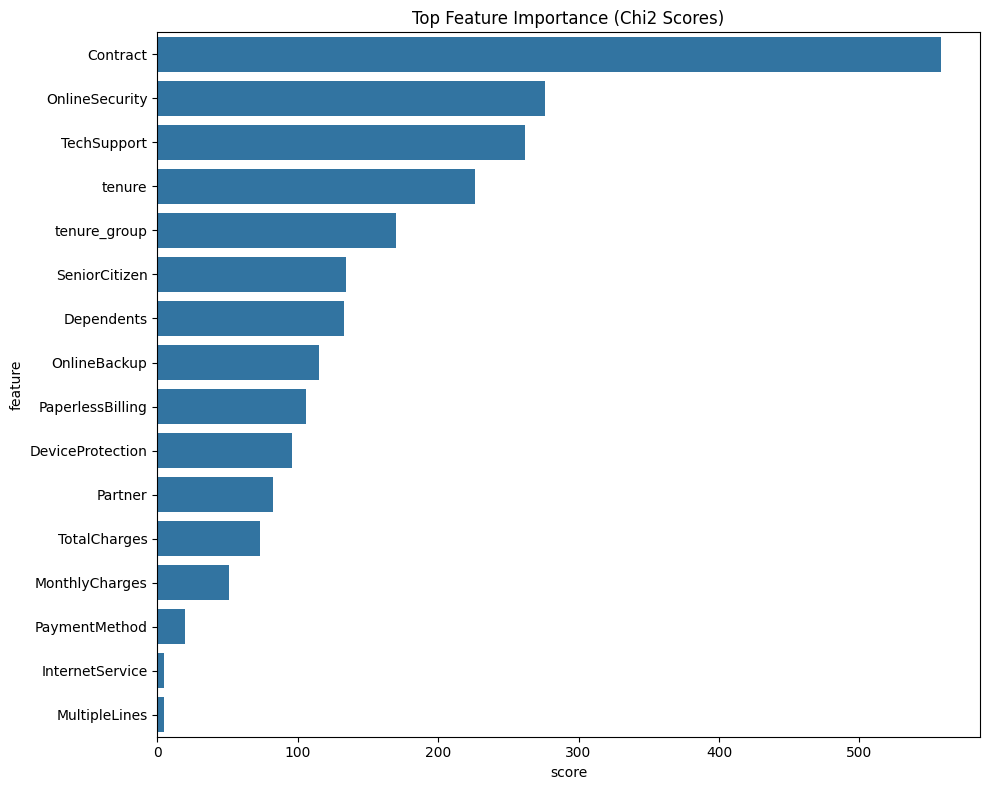

Selected features: ['Contract', 'OnlineSecurity', 'TechSupport', 'tenure', 'tenure_group', 'SeniorCitizen', 'Dependents', 'OnlineBackup', 'PaperlessBilling', 'DeviceProtection', 'Partner', 'TotalCharges', 'MonthlyCharges', 'PaymentMethod', 'InternetService', 'MultipleLines']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Feature importance and selection function using Chi2
def select_features(X, y, n_features=None):
    """Select most important features using Chi-squared test"""
    if n_features is None:
        n_features = int(X.shape[1] * 0.8)  # Default to using 80% of features

    print(f"Selecting top {n_features} features using Chi2...")

    # Ensure features are non-negative for Chi2
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    # Apply Chi2 test
    selector = SelectKBest(score_func=chi2, k=n_features)
    selector.fit(X_scaled, y)

    # Get feature scores
    feature_scores = pd.DataFrame({
        'feature': X.columns,
        'score': selector.scores_
    }).sort_values('score', ascending=False)

    # Plot feature scores
    plt.figure(figsize=(10, 8))
    sns.barplot(x='score', y='feature', data=feature_scores.head(n_features))
    plt.title('Top Feature Importance (Chi2 Scores)')
    plt.tight_layout()
    plt.savefig('plots/feature_importance_chi2.png')
    plt.show()
    plt.close()

    # Select top features
    top_features = feature_scores.head(n_features)['feature'].tolist()
    X_selected = X[top_features]
    print(f"Selected features: {top_features}")
    return X_selected, top_features

# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Feature selection
X_selected, selected_features = select_features(X, y, n_features=int(X.shape[1] * 0.8))

### Part 3: Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

### Part 4 : Data Augmentation

In [ ]:
from imblearn.over_sampling import SMOTE

# Function to handle class imbalance
def balance_data(X, y, method='smote'):
    """Balance dataset using SMOTE"""
    print(f"Balancing data using {method}...")
    sampler = SMOTE(random_state=RANDOM_STATE)
    X_balanced, y_balanced = sampler.fit_resample(X, y)
    print(f"Original class distribution: {pd.Series(y).value_counts().to_dict()}")
    print(f"Balanced class distribution: {pd.Series(y_balanced).value_counts().to_dict()}")
    return X_balanced, y_balanced

# Balance only the training data
X_train_balanced, y_train_balanced = balance_data(X_train, y_train, method='smote')

Balancing data using smote...
Original class distribution: {0: 4139, 1: 1495}
Balanced class distribution: {0: 4139, 1: 4139}


### Part 5: Save Selected Features

In [ ]:
import pickle

# Save selected features
with open('models/DT_Chi2_selected_features.pkl', 'wb') as f:
    pickle.dump(selected_features, f)

### Part 6: Model Training

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define Decision Tree model
dt_model = DecisionTreeClassifier(
    min_samples_split=10,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=RANDOM_STATE
)

# Train the model
print("\n--- Training Decision Tree Model ---")
dt_model.fit(X_train_balanced, y_train_balanced)


--- Training Decision Tree Model ---


DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=4,
                       min_samples_split=10, random_state=42)

In [ ]:
depth = dt_model.get_depth()
print(f"Decision Tree Depth: {depth}")

Decision Tree Depth: 22


### Part 7: Model Evaluation and Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Predictions
y_train_pred = dt_model.predict(X_train_balanced)
y_test_pred = dt_model.predict(X_test)
y_test_prob = dt_model.predict_proba(X_test)[:, 1]

# Calculate metrics
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
gap = abs(train_accuracy - test_accuracy)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Print results
print("\nClassification Report for Decision Tree (Test Set):")
print(classification_report(y_test, y_test_pred))
print(f"Decision Tree Train Accuracy: {train_accuracy:.4f}")
print(f"Decision Tree Test Accuracy: {test_accuracy:.4f}")
print(f"Decision Tree Accuracy Gap: {gap:.4f}")
print(f"Decision Tree ROC AUC: {roc_auc:.4f}")


Classification Report for Decision Tree (Test Set):
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1035
           1       0.48      0.57      0.52       374

    accuracy                           0.72      1409
   macro avg       0.66      0.67      0.66      1409
weighted avg       0.74      0.72      0.73      1409

Decision Tree Train Accuracy: 0.8962
Decision Tree Test Accuracy: 0.7232
Decision Tree Accuracy Gap: 0.1730
Decision Tree ROC AUC: 0.7287


### Part 8: Visualization (Confusion Matrix and Decision Tree)

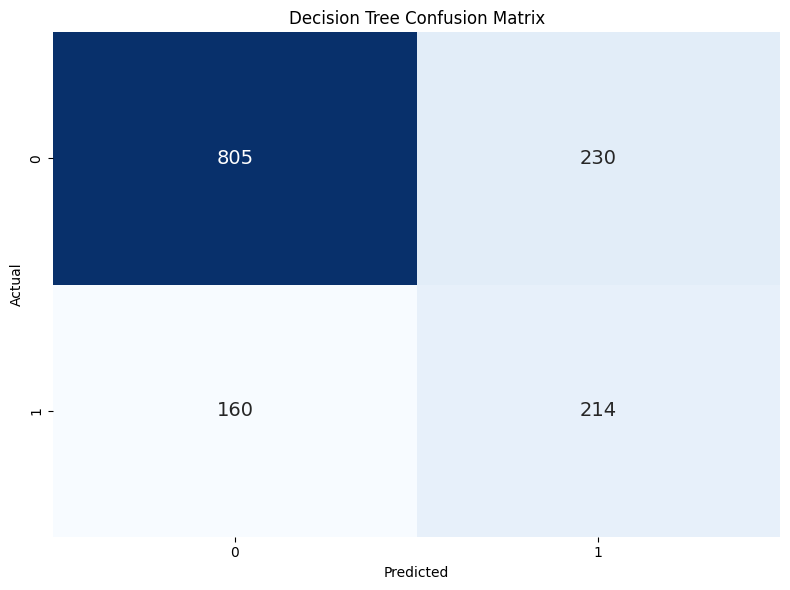

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('plots/DT_Chi2_confusion_matrix.png')
plt.show()
plt.close()

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a DOT format
dot_data = export_graphviz(
    dt_model,
    out_file=None,  # Return DOT data as a string
    feature_names=X_selected.columns,  # Updated to use X_selected.columns
    class_names=['No Churn', 'Churn'],
    filled=True,  # Color nodes based on class
    rounded=True,  # Rounded node corners
    special_characters=True  # Handle special characters
)

# Set font size by modifying the DOT data
dot_data = dot_data.replace('node [', 'node [ fontsize=10 ')

# Create a Graphviz source object
graph = graphviz.Source(dot_data, format='png')

# Render and save the visualization
graph.render('plots/DT_Chi2_visualization', view=True, cleanup=True)

# Display in Jupyter notebook (if applicable)
graph

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.814674 to fit


### Part 9: Error Analysis

In [ ]:
# Part 9: Error Analysis using LIME

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import lime
import lime.lime_tabular

# Part 9.1: Create Results DataFrame
print("\n--- Part 9.1: Results DataFrame Created ---")
results_dt = X_test.copy()
results_dt['True Label'] = y_test.map({0: 'No Churn', 1: 'Churn'})
results_dt['Predicted Label'] = y_test_pred
results_dt['Predicted Label'] = results_dt['Predicted Label'].map({0: 'No Churn', 1: 'Churn'})
results_dt['Correct'] = results_dt['True Label'] == results_dt['Predicted Label']

print(f"Total samples: {len(results_dt)}")
print(f"Correct predictions: {results_dt['Correct'].sum()}")
print(f"Incorrect predictions: {len(results_dt) - results_dt['Correct'].sum()}")


--- Part 9.1: Results DataFrame Created ---
Total samples: 1409
Correct predictions: 1019
Incorrect predictions: 390


In [ ]:
# Part 9.2: Sample Correct and Incorrect Predictions
display_columns = X_test.columns.tolist()

# Sample correct predictions
correct_dt = results_dt[results_dt['Correct']].sample(
    min(5, len(results_dt[results_dt['Correct']])),
    random_state=RANDOM_STATE
)[display_columns + ['True Label', 'Predicted Label']]

# Sample incorrect predictions
incorrect_samples = results_dt[~results_dt['Correct']]
if len(incorrect_samples) == 0:
    print("\n--- Part 9.2: Sampling Correct and Incorrect Predictions ---")
    print("No incorrect predictions found for Decision Tree. All test samples were classified correctly.")
    incorrect_dt = pd.DataFrame(columns=display_columns + ['True Label', 'Predicted Label'])
else:
    sample_size = min(5, len(incorrect_samples))
    incorrect_dt = incorrect_samples.sample(
        sample_size, random_state=RANDOM_STATE
    )[display_columns + ['True Label', 'Predicted Label']]

In [ ]:
# Display samples
print("\n--- Correct Predictions Sample ---")
correct_dt


--- Correct Predictions Sample ---


Contract  OnlineSecurity  TechSupport    tenure  tenure_group  \
6847         0               0            0  0.250000             1   
5422         2               2            2  0.944444             0   
6623         0               0            0  0.013889             2   
3283         1               1            1  0.958333             0   
3703         1               1            1  0.125000             2   

      SeniorCitizen  Dependents  OnlineBackup  PaperlessBilling  \
6847              0           1             0                 0   
5422              0           1             2                 0   
6623              1           0             0                 1   
3283              0           1             1                 1   
3703              0           1             1                 0   

      DeviceProtection  Partner  TotalCharges  MonthlyCharges  PaymentMethod  \
6847                 0        1      0.122779        0.375124              3   
5422                 2        1      0.502769        0.441791              1   
6623                 0        0      0.006652        0.579104              2   
3283                 1        1      0.164303        0.020896              1   
3703                 1        0      0.019784        0.018408              3   

      InternetService  MultipleLines True Label Predicted Label  
6847                0              0   No Churn        No Churn  
5422                0              0   No Churn        No Churn  
6623                1              2      Churn           Churn  
3283                2              0   No Churn        No Churn  
3703                2              0   No Churn        No Churn

In [ ]:
print("\n--- Incorrect Predictions Sample ---")
incorrect_dt


--- Incorrect Predictions Sample ---


Contract  OnlineSecurity  TechSupport    tenure  tenure_group  \
5547         0               0            0  0.041667             2   
5207         0               0            0  0.333333             1   
2448         0               0            0  0.194444             1   
5860         0               0            0  0.027778             2   
560          1               0            2  0.777778             0   

      SeniorCitizen  Dependents  OnlineBackup  PaperlessBilling  \
5547              0           0             0                 1   
5207              1           0             0                 1   
2448              1           0             2                 1   
5860              0           0             0                 0   
560               0           0             2                 1   

      DeviceProtection  Partner  TotalCharges  MonthlyCharges  PaymentMethod  \
5547                 0        0      0.025577        0.708458              2   
5207                 2        1      0.105527        0.222886              1   
2448                 2        0      0.174544        0.861692              2   
5860                 0        0      0.015492        0.514925              0   
560                  0        1      0.694034        0.885572              2   

      InternetService  MultipleLines True Label Predicted Label  
5547                1              0      Churn        No Churn  
5207                0              1      Churn        No Churn  
2448                1              2      Churn        No Churn  
5860                1              0      Churn        No Churn  
560                 1              2   No Churn           Churn

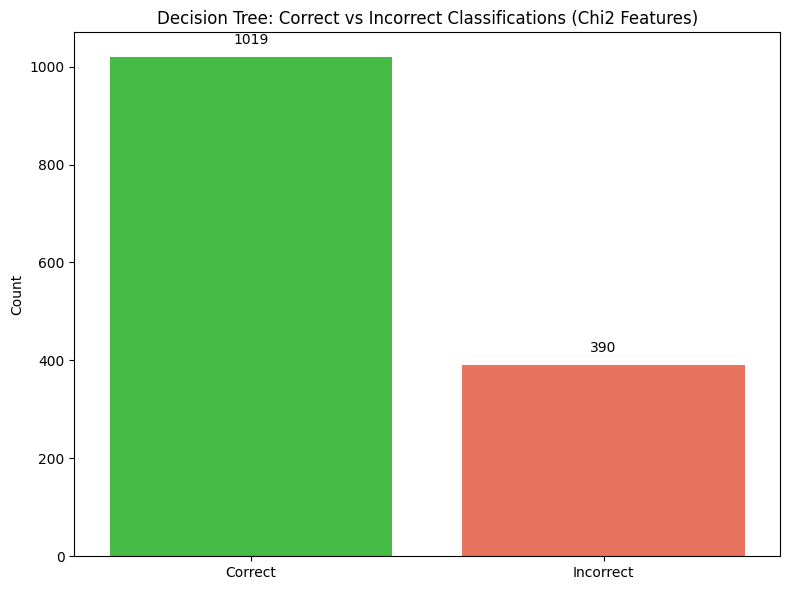


--- Part 9.3: Visualization Complete ---
Bar chart saved to 'plots/DT_Chi2_correct_vs_incorrect.png'


In [ ]:
# Part 9.3: Visualize Correct vs. Incorrect Predictions
correct_count_dt = results_dt['Correct'].sum()
incorrect_count_dt = len(results_dt) - correct_count_dt

# Create bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=['Correct', 'Incorrect'], y=[correct_count_dt, incorrect_count_dt], palette=['#32CD32', '#FF6347'])
plt.title('Decision Tree: Correct vs Incorrect Classifications (Chi2 Features)')
plt.ylabel('Count')
for i, count in enumerate([correct_count_dt, incorrect_count_dt]):
    plt.text(i, count + 0.02 * max(correct_count_dt, incorrect_count_dt), str(count), ha='center', va='bottom')
plt.tight_layout()
plt.savefig('plots/DT_Chi2_correct_vs_incorrect.png')
plt.show()
plt.close()

print("\n--- Part 9.3: Visualization Complete ---")
print("Bar chart saved to 'plots/DT_Chi2_correct_vs_incorrect.png'")

In [ ]:
# Part 9.4: LIME Explanations
# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_balanced.values,
    feature_names=X_train_balanced.columns.tolist(),
    class_names=['No Churn', 'Churn'],
    mode='classification',
    random_state=RANDOM_STATE
)

# Function to generate LIME explanation
def explain_instance(instance, model, explainer, num_features=5):
    """Generate LIME explanation for a single instance"""
    exp = explainer.explain_instance(
        data_row=instance,
        predict_fn=model.predict_proba,
        num_features=num_features
    )
    return exp

In [ ]:
print("\n--- Part 9.4: LIME Explanations ---")
if not correct_dt.empty:
    print("\nLIME Explanation for a Correct Prediction:")
    correct_instance = correct_dt.iloc[0][display_columns].values
    correct_exp = explain_instance(correct_instance, dt_model, explainer)
    correct_exp.save_to_file('plots/DT_Chi2_lime_correct.html')
    print("LIME explanation for correct prediction saved to 'plots/DT_Chi2_lime_correct.html'")

    # Convert LIME explanation to a table
    explanation_list = correct_exp.as_list()
    explanation_df = pd.DataFrame(explanation_list, columns=['Feature', 'Weight'])

    # Display the table using tabulate
    print("\nLIME Explanation Table for Correct Prediction:")
    print(tabulate(explanation_df, headers='keys', tablefmt='psql', showindex=False))
else:
    print("\nNo correct predictions to explain with LIME.")


--- Part 9.4: LIME Explanations ---

LIME Explanation for a Correct Prediction:
LIME explanation for correct prediction saved to 'plots/DT_Chi2_lime_correct.html'

LIME Explanation Table for Correct Prediction:
+-------------------------------+------------+
| Feature                       |     Weight |
|-------------------------------+------------|
| Contract <= 0.00              |  0.318586  |
| 0.27 < MonthlyCharges <= 0.56 | -0.137821  |
| TechSupport <= 0.00           |  0.0897977 |
| Dependents > 0.00             | -0.0694583 |
| OnlineSecurity <= 0.00        |  0.0563218 |
+-------------------------------+------------+


In [ ]:
if not incorrect_dt.empty:
    print("\nLIME Explanation for an Incorrect Prediction:")
    incorrect_instance = incorrect_dt.iloc[0][display_columns].values
    incorrect_exp = explain_instance(incorrect_instance, dt_model, explainer)
    incorrect_exp.save_to_file('plots/DT_Chi2_lime_incorrect.html')
    print("LIME explanation for incorrect prediction saved to 'plots/DT_Chi2_lime_incorrect.html'")

    # Convert LIME explanation to a table
    explanation_list = incorrect_exp.as_list()
    explanation_df = pd.DataFrame(explanation_list, columns=['Feature', 'Weight'])

    # Display the table using tabulate
    print("\nLIME Explanation Table for Incorrect Prediction:")
    print(tabulate(explanation_df, headers='keys', tablefmt='psql', showindex=False))
else:
    print("\nNo incorrect predictions to explain with LIME.")


LIME Explanation for an Incorrect Prediction:
LIME explanation for incorrect prediction saved to 'plots/DT_Chi2_lime_incorrect.html'

LIME Explanation Table for Incorrect Prediction:
+------------------------------+-----------+
| Feature                      |    Weight |
|------------------------------+-----------|
| Contract <= 0.00             | 0.343616  |
| tenure <= 0.08               | 0.19098   |
| TechSupport <= 0.00          | 0.064356  |
| OnlineSecurity <= 0.00       | 0.0456801 |
| 1.00 < PaymentMethod <= 2.00 | 0.0433989 |
+------------------------------+-----------+


### Part 10: Model Saving

In [ ]:
# Save the model
model_filename = 'models/Decision_Tree_Chi2_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(dt_model, f)
print(f"Decision Tree model saved as {model_filename}")

print("\nDecision Tree model optimization completed successfully!")

Decision Tree model saved as models/Decision_Tree_Chi2_model.pkl

Decision Tree model optimization completed successfully!


## Naive Bayes + Chi2 Feature Selection

### Part 1: Data Loading and Exploration

In [ ]:
import pandas as pd
import os
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Create directories if they don't exist
os.makedirs('models', exist_ok=True)
os.makedirs('plots', exist_ok=True)

# Load preprocessed data
try:
    data = pd.read_csv('preprocessed_data.csv')
    print(f"Data loaded successfully with shape: {data.shape}")
except FileNotFoundError:
    print("Error: 'preprocessed_data.csv' not found.")
    exit(1)

# Data exploration
print("\n--- Data exploration ---")
print(f"Dataset shape: {data.shape}")
print(f"Class distribution: {data['Churn'].value_counts().to_dict()}")

Data loaded successfully with shape: (7043, 21)

--- Data exploration ---
Dataset shape: (7043, 21)
Class distribution: {0: 5174, 1: 1869}


### Part 2: Feature Selection (Chi2)

Selecting top 16 features using Chi2...


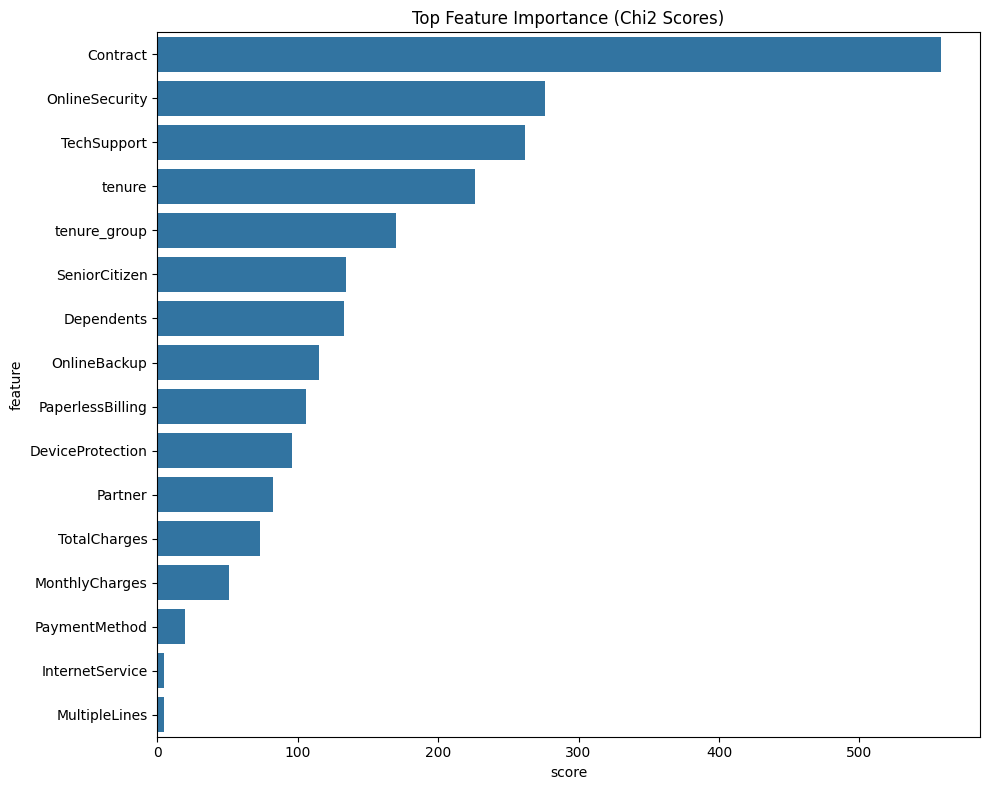

Selected features: ['Contract', 'OnlineSecurity', 'TechSupport', 'tenure', 'tenure_group', 'SeniorCitizen', 'Dependents', 'OnlineBackup', 'PaperlessBilling', 'DeviceProtection', 'Partner', 'TotalCharges', 'MonthlyCharges', 'PaymentMethod', 'InternetService', 'MultipleLines']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Feature importance and selection function using Chi2
def select_features(X, y, n_features=None):
    """Select most important features using Chi-squared test"""
    if n_features is None:
        n_features = int(X.shape[1] * 0.8)  # Default to using 80% of features

    print(f"Selecting top {n_features} features using Chi2...")

    # Ensure features are non-negative for Chi2
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    # Apply Chi2 test
    selector = SelectKBest(score_func=chi2, k=n_features)
    selector.fit(X_scaled, y)

    # Get feature scores
    feature_scores = pd.DataFrame({
        'feature': X.columns,
        'score': selector.scores_
    }).sort_values('score', ascending=False)

    # Plot feature scores
    plt.figure(figsize=(10, 8))
    sns.barplot(x='score', y='feature', data=feature_scores.head(n_features))
    plt.title('Top Feature Importance (Chi2 Scores)')
    plt.tight_layout()
    plt.savefig('plots/feature_importance_chi2.png')
    plt.show()
    plt.close()

    # Select top features
    top_features = feature_scores.head(n_features)['feature'].tolist()
    X_selected = X[top_features]
    print(f"Selected features: {top_features}")
    return X_selected, top_features

# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Feature selection
X_selected, selected_features = select_features(X, y, n_features=int(X.shape[1] * 0.8))

### Part 3: Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

### Part 4: Data Augmentation

In [ ]:
from imblearn.over_sampling import SMOTE

# Function to handle class imbalance
def balance_data(X, y, method='smote'):
    """Balance dataset using SMOTE"""
    print(f"Balancing data using {method}...")
    sampler = SMOTE(random_state=RANDOM_STATE)
    X_balanced, y_balanced = sampler.fit_resample(X, y)
    print(f"Original class distribution: {pd.Series(y).value_counts().to_dict()}")
    print(f"Balanced class distribution: {pd.Series(y_balanced).value_counts().to_dict()}")
    return X_balanced, y_balanced

# Balance only the training data
X_train_balanced, y_train_balanced = balance_data(X_train, y_train, method='smote')

Balancing data using smote...
Original class distribution: {0: 4139, 1: 1495}
Balanced class distribution: {0: 4139, 1: 4139}


### Part 5: Save Selected Features

In [ ]:
import pickle

# Save selected features
with open('models/NB_Chi2_selected_features.pkl', 'wb') as f:
    pickle.dump(selected_features, f)

### Part 6: Model Training

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Define Naive Bayes model
nb_model = GaussianNB()

# Define parameter grid for var_smoothing
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Perform grid search
grid_search = GridSearchCV(
    nb_model, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1
)
print("\n--- Training Naive Bayes Model with Grid Search ---")
grid_search.fit(X_train_balanced, y_train_balanced)

# Best model
nb_model = grid_search.best_estimator_
print(f"Best var_smoothing: {grid_search.best_params_['var_smoothing']}")
print(f"Best cross-validation F1-macro score: {grid_search.best_score_:.4f}")


--- Training Naive Bayes Model with Grid Search ---
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best var_smoothing: 1e-09
Best cross-validation F1-macro score: 0.7524


### Part 7: Model Evaluation and Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Predictions
y_train_pred = nb_model.predict(X_train_balanced)
y_test_pred = nb_model.predict(X_test)
y_test_prob = nb_model.predict_proba(X_test)[:, 1]

# Calculate metrics
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
gap = abs(train_accuracy - test_accuracy)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Print results
print("\nClassification Report for Naive Bayes (Test Set):")
print(classification_report(y_test, y_test_pred))
print(f"Naive Bayes Train Accuracy: {train_accuracy:.4f}")
print(f"Naive Bayes Test Accuracy: {test_accuracy:.4f}")
print(f"Naive Bayes Accuracy Gap also known as Overfitting: {gap:.4f}")
print(f"Naive Bayes ROC AUC: {roc_auc:.4f}")


Classification Report for Naive Bayes (Test Set):
              precision    recall  f1-score   support

           0       0.91      0.68      0.77      1035
           1       0.47      0.81      0.60       374

    accuracy                           0.71      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.71      0.73      1409

Naive Bayes Train Accuracy: 0.7550
Naive Bayes Test Accuracy: 0.7119
Naive Bayes Accuracy Gap also known as Overfitting: 0.0432
Naive Bayes ROC AUC: 0.8191


### Part 8: Visualization

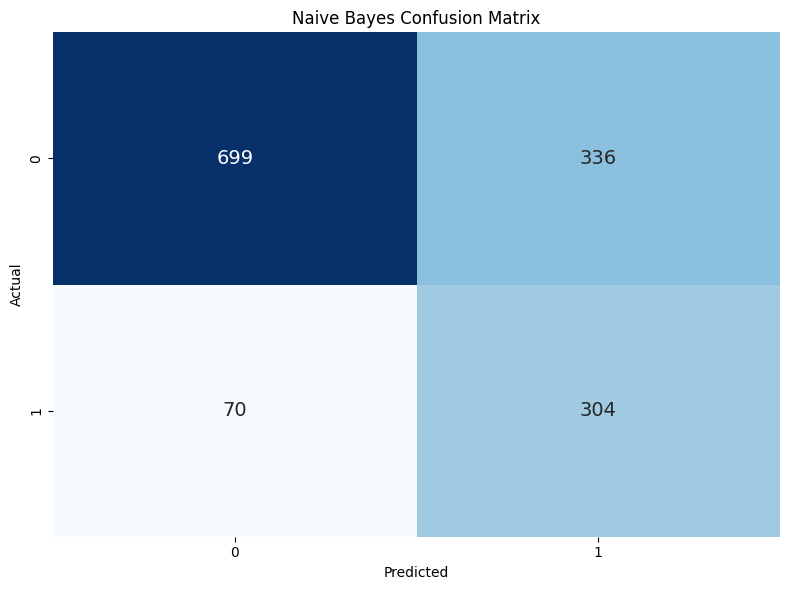

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('plots/NB_Chi2_confusion_matrix.png')
plt.show()
plt.close()

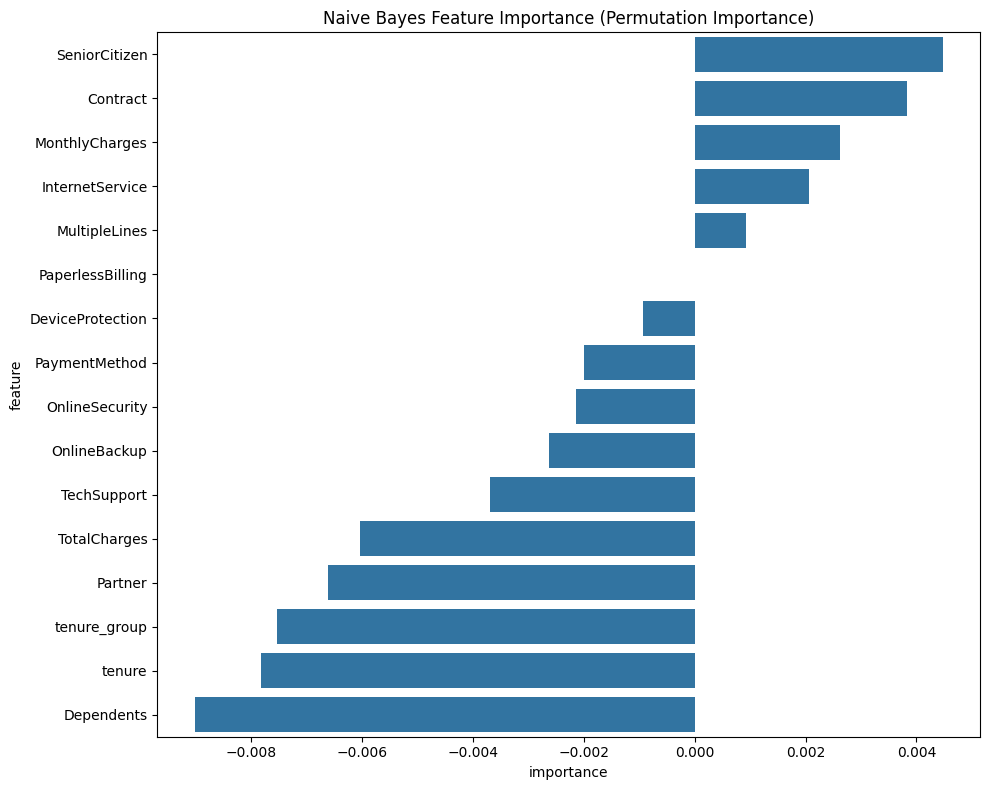

In [ ]:
# Compute permutation importance
perm_importance = permutation_importance(nb_model, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE)
feature_importance = pd.DataFrame({
    'feature': X_selected.columns,
    'importance': perm_importance.importances_mean
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(len(selected_features)))
plt.title('Naive Bayes Feature Importance (Permutation Importance)')
plt.tight_layout()
plt.savefig('plots/NB_Chi2_feature_importance.png')
plt.show()
plt.close()

### Part 9: Error Analysis

In [ ]:
# Part 9: Error Analysis with LIME

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lime import lime_tabular
from tabulate import tabulate

# Part 9.1: Create Results DataFrame
print("\n--- Part 9.1: Results DataFrame Created ---")
results_nb = X_test.copy()
results_nb['True Label'] = y_test.map({0: 'No Churn', 1: 'Churn'})
results_nb['Predicted Label'] = y_test_pred
results_nb['Predicted Label'] = results_nb['Predicted Label'].map({0: 'No Churn', 1: 'Churn'})
results_nb['Correct'] = results_nb['True Label'] == results_nb['Predicted Label']

print(f"Total samples: {len(results_nb)}")
print(f"Correct predictions: {results_nb['Correct'].sum()}")
print(f"Incorrect predictions: {len(results_nb) - results_nb['Correct'].sum()}")


--- Part 9.1: Results DataFrame Created ---
Total samples: 1409
Correct predictions: 1003
Incorrect predictions: 406


In [ ]:
# Part 9.2: Sample Correct and Incorrect Predictions
display_columns = X_test.columns.tolist()

# Sample correct predictions
correct_nb = results_nb[results_nb['Correct']].sample(
    min(5, len(results_nb[results_nb['Correct']])),
    random_state=RANDOM_STATE
)[display_columns + ['True Label', 'Predicted Label']]

# Sample incorrect predictions
incorrect_samples = results_nb[~results_nb['Correct']]
if len(incorrect_samples) == 0:
    print("\n--- Part 9.2: Sampling Correct and Incorrect Predictions ---")
    print("No incorrect predictions found for Naive Bayes. All test samples were classified correctly.")
    incorrect_nb = pd.DataFrame(columns=display_columns + ['True Label', 'Predicted Label'])
else:
    sample_size = min(5, len(incorrect_samples))
    incorrect_nb = incorrect_samples.sample(
        sample_size, random_state=RANDOM_STATE
    )[display_columns + ['True Label', 'Predicted Label']]

In [ ]:
# Display samples
print("\n--- Correct Predictions Sample ---")
correct_nb


--- Correct Predictions Sample ---


Contract  OnlineSecurity  TechSupport    tenure  tenure_group  \
1834         0               0            0  0.013889             2   
5871         0               2            0  0.333333             1   
2142         1               2            0  0.291667             1   
2760         1               1            1  0.361111             1   
3991         0               0            2  0.055556             2   

      SeniorCitizen  Dependents  OnlineBackup  PaperlessBilling  \
1834              1           0             0                 0   
5871              0           0             0                 1   
2142              0           1             0                 0   
2760              0           0             1                 1   
3991              0           0             2                 1   

      DeviceProtection  Partner  TotalCharges  MonthlyCharges  PaymentMethod  \
1834                 0        0      0.003035        0.267164              2   
5871                 0        0      0.159445        0.372139              0   
2142                 2        0      0.152089        0.463682              3   
2760                 1        0      0.066547        0.023881              1   
3991                 0        0      0.039626        0.748756              2   

      InternetService  MultipleLines True Label Predicted Label  
1834                0              0      Churn           Churn  
5871                0              2      Churn           Churn  
2142                0              0   No Churn        No Churn  
2760                2              0   No Churn        No Churn  
3991                1              2      Churn           Churn

In [ ]:
print("\n--- Incorrect Predictions Sample ---")
incorrect_nb


--- Incorrect Predictions Sample ---


Contract  OnlineSecurity  TechSupport    tenure  tenure_group  \
6853         0               0            2  0.750000             0   
1992         0               0            0  0.236111             1   
5311         0               1            1  0.083333             2   
300          1               0            0  0.319444             1   
4782         0               0            0  0.069444             2   

      SeniorCitizen  Dependents  OnlineBackup  PaperlessBilling  \
6853              0           0             2                 0   
1992              0           0             2                 1   
5311              0           0             1                 0   
300               0           0             0                 1   
4782              0           0             0                 0   

      DeviceProtection  Partner  TotalCharges  MonthlyCharges  PaymentMethod  \
6853                 2        0      0.691905        0.923881              2   
1992                 0        0      0.151206        0.649751              2   
5311                 1        1      0.014713        0.012438              0   
300                  0        0      0.172052        0.464179              0   
4782                 0        0      0.047029        0.601990              3   

      InternetService  MultipleLines True Label Predicted Label  
6853                1              2      Churn        No Churn  
1992                1              0   No Churn           Churn  
5311                2              0      Churn        No Churn  
300                 0              0   No Churn           Churn  
4782                1              0   No Churn           Churn

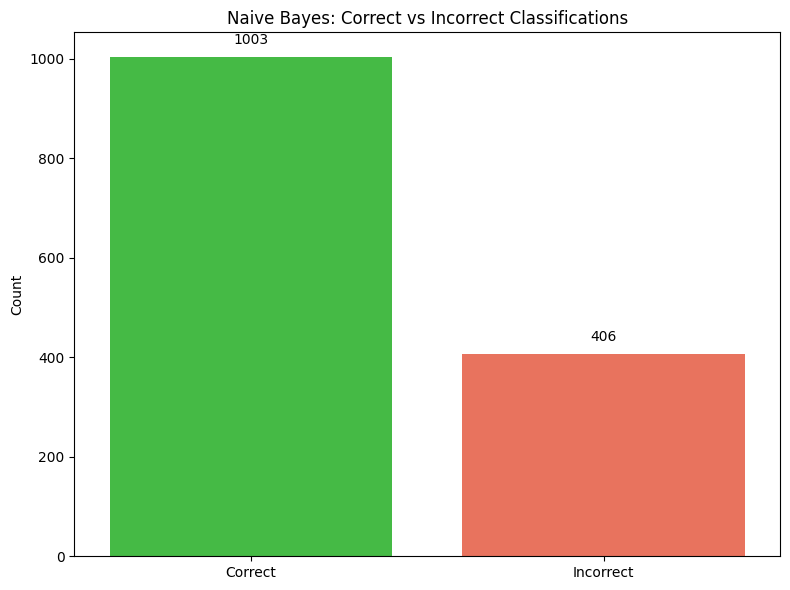


--- Part 9.3: Visualization Complete ---
Bar chart saved to 'plots/NB_Chi2_correct_vs_incorrect.png'


In [ ]:
# Part 9.3: Visualize Correct vs. Incorrect Predictions
correct_count_nb = results_nb['Correct'].sum()
incorrect_count_nb = len(results_nb) - correct_count_nb

# Create bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=['Correct', 'Incorrect'], y=[correct_count_nb, incorrect_count_nb], palette=['#32CD32', '#FF6347'])
plt.title('Naive Bayes: Correct vs Incorrect Classifications')
plt.ylabel('Count')
for i, count in enumerate([correct_count_nb, incorrect_count_nb]):
    plt.text(i, count + 0.02 * max(correct_count_nb, incorrect_count_nb), str(count), ha='center', va='bottom')
plt.tight_layout()
plt.savefig('plots/NB_Chi2_correct_vs_incorrect.png')
plt.show()
plt.close()

print("\n--- Part 9.3: Visualization Complete ---")
print("Bar chart saved to 'plots/NB_Chi2_correct_vs_incorrect.png'")

In [ ]:
# Part 9.4: LIME Explanations
# Initialize LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train_balanced.values,
    feature_names=X_train_balanced.columns.tolist(),
    class_names=['No Churn', 'Churn'],
    mode='classification',
    random_state=RANDOM_STATE
)

# Function to generate LIME explanation
def explain_instance(instance, model, explainer, num_features=5):
    """Generate LIME explanation for a single instance"""
    exp = explainer.explain_instance(
        data_row=instance,
        predict_fn=model.predict_proba,
        num_features=num_features
    )
    return exp

In [ ]:
print("\n--- Part 9.4: LIME Explanations ---")
if not correct_nb.empty:
    print("\nLIME Explanation for a Correct Prediction:")
    correct_instance = correct_nb.iloc[0][display_columns].values
    correct_exp = explain_instance(correct_instance, nb_model, explainer)
    correct_exp.save_to_file('plots/NB_Chi2_lime_correct.html')
    print("LIME explanation for correct prediction saved to 'plots/NB_Chi2_lime_correct.html'")

    # Convert LIME explanation to a table
    explanation_list = correct_exp.as_list()
    explanation_df = pd.DataFrame(explanation_list, columns=['Feature', 'Weight'])

    # Display the table using tabulate
    print("\nLIME Explanation Table for Correct Prediction:")
    print(tabulate(explanation_df, headers='keys', tablefmt='psql', showindex=False))
else:
    print("\nNo correct predictions to explain with LIME.")


--- Part 9.4: LIME Explanations ---

LIME Explanation for a Correct Prediction:
LIME explanation for correct prediction saved to 'plots/NB_Chi2_lime_correct.html'

LIME Explanation Table for Correct Prediction:
+------------------------+----------+
| Feature                |   Weight |
|------------------------+----------|
| Contract <= 0.00       | 0.56562  |
| Dependents <= 0.00     | 0.318562 |
| OnlineSecurity <= 0.00 | 0.142409 |
| tenure <= 0.08         | 0.129992 |
| TechSupport <= 0.00    | 0.122552 |
+------------------------+----------+


In [ ]:
if not incorrect_nb.empty:
    print("\nLIME Explanation for an Incorrect Prediction:")
    incorrect_instance = incorrect_nb.iloc[0][display_columns].values
    incorrect_exp = explain_instance(incorrect_instance, nb_model, explainer)
    incorrect_exp.save_to_file('plots/NB_Chi2_lime_incorrect.html')
    print("LIME explanation for incorrect prediction saved to 'plots/NB_Chi2_lime_incorrect.html'")

    # Convert LIME explanation to a table
    explanation_list = incorrect_exp.as_list()
    explanation_df = pd.DataFrame(explanation_list, columns=['Feature', 'Weight'])

    # Display the table using tabulate
    print("\nLIME Explanation Table for Incorrect Prediction:")
    print(tabulate(explanation_df, headers='keys', tablefmt='psql', showindex=False))
else:
    print("\nNo incorrect predictions to explain with LIME.")


LIME Explanation for an Incorrect Prediction:
LIME explanation for incorrect prediction saved to 'plots/NB_Chi2_lime_incorrect.html'

LIME Explanation Table for Incorrect Prediction:
+------------------------+-----------+
| Feature                |    Weight |
|------------------------+-----------|
| Contract <= 0.00       |  0.555091 |
| Dependents <= 0.00     |  0.305499 |
| tenure > 0.68          | -0.215473 |
| tenure_group <= 0.00   | -0.156885 |
| OnlineSecurity <= 0.00 |  0.152944 |
+------------------------+-----------+


### Part 10: Model Saving

In [ ]:
# Save the model
model_filename = 'models/Naive_Bayes_Chi2_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(nb_model, f)
print(f"Naive Bayes model saved as {model_filename}")

print("\nNaive Bayes model optimization completed successfully!")

Naive Bayes model saved as models/Naive_Bayes_Chi2_model.pkl

Naive Bayes model optimization completed successfully!


## Decision Tree + Sequential Feature Selection

### Part 1: Data Loading and Exploration

In [ ]:
import pandas as pd
import os
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Create directories if they don't exist
os.makedirs('models', exist_ok=True)
os.makedirs('plots', exist_ok=True)

# Load preprocessed data
try:
    data = pd.read_csv('preprocessed_data.csv')
    print(f"Data loaded successfully with shape: {data.shape}")
except FileNotFoundError:
    print("Error: 'preprocessed_data.csv' not found.")
    exit(1)

# Data exploration
print("\n--- Data exploration ---")
print(f"Dataset shape: {data.shape}")
print(f"Class distribution: {data['Churn'].value_counts().to_dict()}")

Data loaded successfully with shape: (7043, 21)

--- Data exploration ---
Dataset shape: (7043, 21)
Class distribution: {0: 5174, 1: 1869}


### Part 2: Feature Selection (SFS)

Selecting top 16 features using Sequential Feature Selection (Forward)...


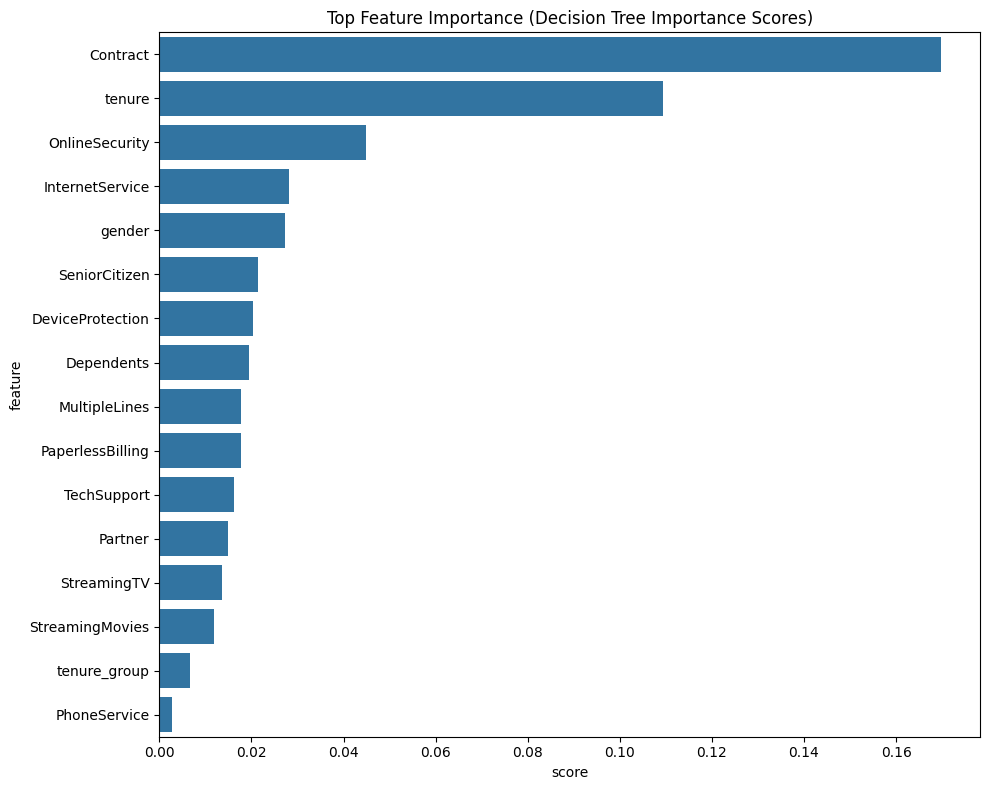

Selected features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'tenure_group']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Feature selection function using Sequential Feature Selection (Forward)
def select_features(X, y, n_features=None):
    """Select most important features using Sequential Feature Selection (Forward)"""
    if n_features is None:
        n_features = int(X.shape[1] * 0.8)  # Default to using 80% of features

    print(f"Selecting top {n_features} features using Sequential Feature Selection (Forward)...")

    # Scale features to ensure non-negative values
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    # Define base model for feature selection
    base_model = DecisionTreeClassifier(random_state=RANDOM_STATE)

    # Apply Sequential Feature Selection (Forward)
    sfs = SequentialFeatureSelector(
        base_model,
        n_features_to_select=n_features,
        direction='forward',
        scoring='accuracy',
        cv=5,
        n_jobs=-1
    )
    sfs.fit(X_scaled, y)

    # Get selected features
    selected_mask = sfs.get_support()
    top_features = X.columns[selected_mask].tolist()

    # Calculate feature importance based on a fitted Decision Tree for visualization
    base_model.fit(X_scaled, y)
    feature_scores = pd.DataFrame({
        'feature': X.columns,
        'score': base_model.feature_importances_
    }).sort_values('score', ascending=False)

    # Plot feature scores for selected features only
    plt.figure(figsize=(10, 8))
    sns.barplot(x='score', y='feature', data=feature_scores[feature_scores['feature'].isin(top_features)])
    plt.title('Top Feature Importance (Decision Tree Importance Scores)')
    plt.tight_layout()
    plt.savefig('plots/feature_importance_sfs.png')
    plt.show()
    plt.close()

    X_selected = X[top_features]
    print(f"Selected features: {top_features}")
    return X_selected, top_features

# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Feature selection
X_selected, selected_features = select_features(X, y, n_features=int(X.shape[1] * 0.8))

### Part 3: Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

### Part 4 : Data Augmentation

In [ ]:
from imblearn.over_sampling import SMOTE

# Function to handle class imbalance
def balance_data(X, y, method='smote'):
    """Balance dataset using SMOTE"""
    print(f"Balancing data using {method}...")
    sampler = SMOTE(random_state=RANDOM_STATE)
    X_balanced, y_balanced = sampler.fit_resample(X, y)
    print(f"Original class distribution: {pd.Series(y).value_counts().to_dict()}")
    print(f"Balanced class distribution: {pd.Series(y_balanced).value_counts().to_dict()}")
    return X_balanced, y_balanced

# Balance only the training data
X_train_balanced, y_train_balanced = balance_data(X_train, y_train, method='smote')

Balancing data using smote...
Original class distribution: {0: 4139, 1: 1495}
Balanced class distribution: {0: 4139, 1: 4139}


### Part 5: Save Selected Features

In [ ]:
import pickle

# Save selected features
with open('models/DT_SFS_selected_features.pkl', 'wb') as f:
    pickle.dump(selected_features, f)
print("Selected features saved as models/selected_features.pkl")

Selected features saved as models/selected_features.pkl


### Part 6: Model Training

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define Decision Tree model
dt_model = DecisionTreeClassifier(
    min_samples_split=10,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=RANDOM_STATE
)

# Train the model
print("\n--- Training Decision Tree Model ---")
dt_model.fit(X_train_balanced, y_train_balanced)


--- Training Decision Tree Model ---


DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=4,
                       min_samples_split=10, random_state=42)

In [ ]:
depth = dt_model.get_depth()
print(f"Decision Tree Depth: {depth}")

Decision Tree Depth: 25


### Part 7: Model Evaluation and Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Predictions
y_train_pred = dt_model.predict(X_train_balanced)
y_test_pred = dt_model.predict(X_test)
y_test_prob = dt_model.predict_proba(X_test)[:, 1]

# Calculate metrics
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
gap = abs(train_accuracy - test_accuracy)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Print results
print("\nClassification Report for Decision Tree (Test Set):")
print(classification_report(y_test, y_test_pred))
print(f"Decision Tree Train Accuracy: {train_accuracy:.4f}")
print(f"Decision Tree Test Accuracy: {test_accuracy:.4f}")
print(f"Decision Tree Accuracy Gap: {gap:.4f}")
print(f"Decision Tree ROC AUC: {roc_auc:.4f}")


Classification Report for Decision Tree (Test Set):
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1035
           1       0.48      0.62      0.54       374

    accuracy                           0.72      1409
   macro avg       0.66      0.69      0.67      1409
weighted avg       0.75      0.72      0.73      1409

Decision Tree Train Accuracy: 0.8769
Decision Tree Test Accuracy: 0.7211
Decision Tree Accuracy Gap: 0.1558
Decision Tree ROC AUC: 0.7533


### Part 8: Visualization (Confusion Matrix and Decision Tree)

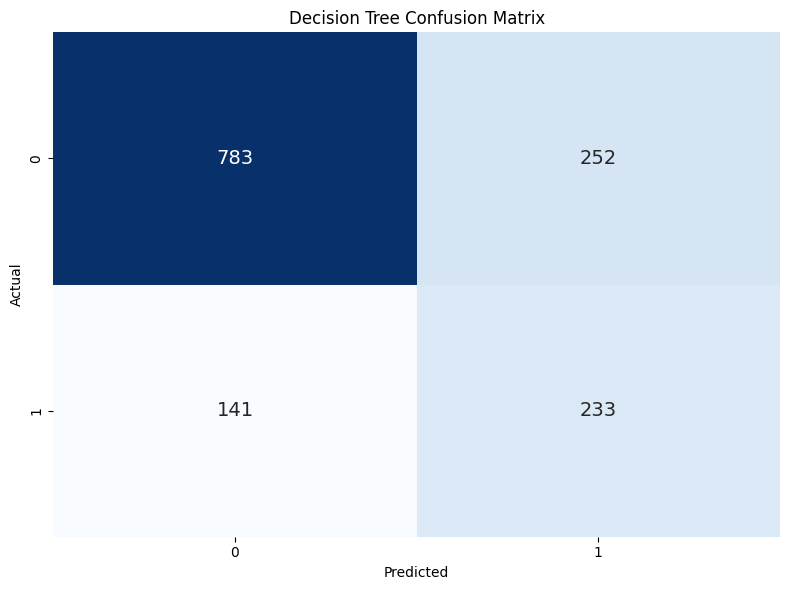

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('plots/DT_SFS_confusion_matrix.png')
plt.show()
plt.close()

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a DOT format
dot_data = export_graphviz(
    dt_model,
    out_file=None,  # Return DOT data as a string
    feature_names=X_selected.columns,  # Use X_selected.columns for feature names
    class_names=['No Churn', 'Churn'],
    filled=True,  # Color nodes based on class
    rounded=True,  # Rounded node corners
    special_characters=True  # Handle special characters
)

# Set font size by modifying the DOT data
dot_data = dot_data.replace('node [', 'node [ fontsize=10 ')

# Create a Graphviz source object
graph = graphviz.Source(dot_data, format='png')

# Render and save the visualization
graph.render('plots/DT_SFS_visualization', view=True, cleanup=True)

# Display in Jupyter notebook (if applicable)
graph

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.725769 to fit


### Part 9: Error Analysis

In [ ]:
# Part 9: Error Analysis using LIME

import pandas as pd
import lime
import lime.lime_tabular
from tabulate import tabulate

# Create results DataFrame
results_dt = X_test.copy()
results_dt['True Label'] = y_test.map({0: 'No Churn', 1: 'Churn'})
results_dt['Predicted Label'] = y_test_pred
results_dt['Predicted Label'] = results_dt['Predicted Label'].map({0: 'No Churn', 1: 'Churn'})
results_dt['Correct'] = results_dt['True Label'] == results_dt['Predicted Label']

print("\n--- Part 9.1: Results DataFrame Created ---")
print(f"Total samples: {len(results_dt)}")
print(f"Correct predictions: {results_dt['Correct'].sum()}")
print(f"Incorrect predictions: {len(results_dt) - results_dt['Correct'].sum()}")


--- Part 9.1: Results DataFrame Created ---
Total samples: 1409
Correct predictions: 1016
Incorrect predictions: 393


In [ ]:
# Define display columns (selected features from SFS)
display_columns = X_selected.columns.tolist()

# Sample correct predictions
correct_dt = results_dt[results_dt['Correct']].sample(
    min(5, len(results_dt[results_dt['Correct']])),
    random_state=RANDOM_STATE
)[display_columns + ['True Label', 'Predicted Label']]

# Sample incorrect predictions
incorrect_samples = results_dt[~results_dt['Correct']]
if len(incorrect_samples) == 0:
    print("\n--- Part 9.2: Sampling Correct and Incorrect Predictions ---")
    print("No incorrect predictions found for Decision Tree. All test samples were classified correctly.")
    incorrect_dt = pd.DataFrame(columns=display_columns + ['True Label', 'Predicted Label'])
else:
    sample_size = min(5, len(incorrect_samples))
    incorrect_dt = incorrect_samples.sample(
        sample_size, random_state=RANDOM_STATE
    )[display_columns + ['True Label', 'Predicted Label']]

In [ ]:
# Display samples
print("\n--- Correct Predictions Sample ---")
correct_dt


--- Correct Predictions Sample ---


gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
6967       1              1        0           0  0.347222             1   
4570       1              0        0           0  0.097222             1   
2155       0              0        1           0  0.416667             1   
6564       1              0        0           0  0.069444             1   
503        0              0        1           1  0.722222             1   

      MultipleLines  InternetService  OnlineSecurity  DeviceProtection  \
6967              2                1               0                 0   
4570              0                2               1                 1   
2155              2                1               0                 0   
6564              0                2               1                 1   
503               0                1               2                 2   

      TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
6967            0            2                0         0                 1   
4570            1            1                1         0                 1   
2155            0            0                2         0                 1   
6564            1            1                1         0                 0   
503             2            0                0         0                 1   

      tenure_group True Label Predicted Label  
6967             1      Churn           Churn  
4570             2   No Churn        No Churn  
2155             1      Churn           Churn  
6564             2   No Churn        No Churn  
503              0   No Churn        No Churn

In [ ]:
print("\n--- Incorrect Predictions Sample ---")
incorrect_dt


--- Incorrect Predictions Sample ---


gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
4817       0              0        0           0  0.013889             1   
3197       0              0        1           1  0.305556             1   
1834       1              1        0           0  0.013889             1   
4923       0              0        0           0  0.722222             1   
3737       0              0        0           0  0.069444             1   

      MultipleLines  InternetService  OnlineSecurity  DeviceProtection  \
4817              0                2               1                 1   
3197              0                0               0                 0   
1834              0                0               0                 0   
4923              0                0               2                 0   
3737              2                0               0                 0   

      TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
4817            1            1                1         0                 0   
3197            0            2                2         1                 1   
1834            0            0                0         0                 0   
4923            0            0                0         0                 1   
3737            0            0                0         0                 1   

      tenure_group True Label Predicted Label  
4817             2   No Churn           Churn  
3197             1      Churn        No Churn  
1834             2      Churn        No Churn  
4923             0   No Churn           Churn  
3737             2      Churn        No Churn

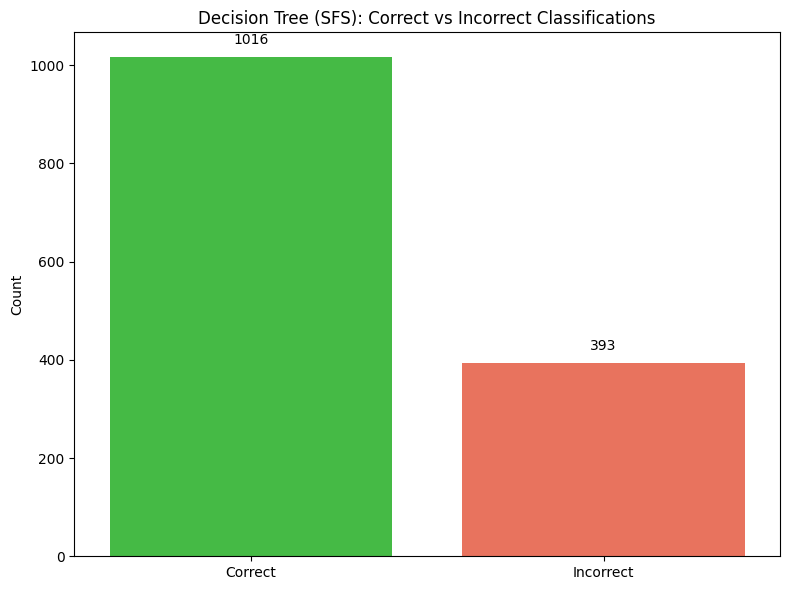


--- Part 9.3: Visualization Complete ---
Bar chart saved to 'plots/DT_SFS_correct_vs_incorrect.png'


In [ ]:
# Visualize Correct vs. Incorrect Predictions
import seaborn as sns
import matplotlib.pyplot as plt

# Count correct and incorrect predictions
correct_count_dt = results_dt['Correct'].sum()
incorrect_count_dt = len(results_dt) - correct_count_dt

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=['Correct', 'Incorrect'], y=[correct_count_dt, incorrect_count_dt], palette=['#32CD32', '#FF6347'])
plt.title('Decision Tree (SFS): Correct vs Incorrect Classifications')
plt.ylabel('Count')
for i, count in enumerate([correct_count_dt, incorrect_count_dt]):
    plt.text(i, count + 0.02 * max(correct_count_dt, incorrect_count_dt), str(count), ha='center', va='bottom')
plt.tight_layout()
plt.savefig('plots/DT_SFS_correct_vs_incorrect.png')
plt.show()
plt.close()

print("\n--- Part 9.3: Visualization Complete ---")
print("Bar chart saved to 'plots/DT_SFS_correct_vs_incorrect.png'")

In [ ]:
# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_balanced.values,
    feature_names=X_train_balanced.columns.tolist(),
    class_names=['No Churn', 'Churn'],
    mode='classification',
    random_state=RANDOM_STATE
)

# Function to generate LIME explanation
def explain_instance(instance, model, explainer, num_features=5):
    """Generate LIME explanation for a single instance"""
    exp = explainer.explain_instance(
        data_row=instance,
        predict_fn=model.predict_proba,
        num_features=num_features
    )
    return exp

In [ ]:
print("\n--- Part 9.4: LIME Explanations ---")
if not correct_dt.empty:
    print("\nLIME Explanation for a Correct Prediction:")
    correct_instance = correct_dt.iloc[0][display_columns].values
    correct_exp = explain_instance(correct_instance, dt_model, explainer)
    correct_exp.save_to_file('plots/DT_SFS_lime_correct.html')
    print("LIME explanation for correct prediction saved to 'plots/DT_SFS_lime_correct.html'")

    # Convert LIME explanation to a table
    explanation_list = correct_exp.as_list()
    explanation_df = pd.DataFrame(explanation_list, columns=['Feature', 'Weight'])

    # Display the table using tabulate
    print("\nLIME Explanation Table for Correct Prediction:")
    print(tabulate(explanation_df, headers='keys', tablefmt='psql', showindex=False))
else:
    print("\nNo correct predictions to explain with LIME.")


--- Part 9.4: LIME Explanations ---

LIME Explanation for a Correct Prediction:
LIME explanation for correct prediction saved to 'plots/DT_SFS_lime_correct.html'

LIME Explanation Table for Correct Prediction:
+--------------------------------+------------+
| Feature                        |     Weight |
|--------------------------------+------------|
| Contract <= 0.00               |  0.390983  |
| 0.31 < tenure <= 0.68          | -0.097061  |
| Dependents <= 0.00             |  0.0767303 |
| TechSupport <= 0.00            |  0.0710649 |
| 0.00 < InternetService <= 1.00 |  0.0704018 |
+--------------------------------+------------+


In [ ]:
if not incorrect_dt.empty:
    print("\nLIME Explanation for an Incorrect Prediction:")
    incorrect_instance = incorrect_dt.iloc[0][display_columns].values
    incorrect_exp = explain_instance(incorrect_instance, dt_model, explainer)
    incorrect_exp.save_to_file('plots/DT_SFS_lime_incorrect.html')
    print("LIME explanation for incorrect prediction saved to 'plots/DT_SFS_lime_incorrect.html'")

    # Convert LIME explanation to a table
    explanation_list = incorrect_exp.as_list()
    explanation_df = pd.DataFrame(explanation_list, columns=['Feature', 'Weight'])

    # Display the table using tabulate
    print("\nLIME Explanation Table for Incorrect Prediction:")
    print(tabulate(explanation_df, headers='keys', tablefmt='psql', showindex=False))
else:
    print("\nNo incorrect predictions to explain with LIME.")


LIME Explanation for an Incorrect Prediction:
LIME explanation for incorrect prediction saved to 'plots/DT_SFS_lime_incorrect.html'

LIME Explanation Table for Incorrect Prediction:
+----------------------------+------------+
| Feature                    |     Weight |
|----------------------------+------------|
| Contract <= 0.00           |  0.385282  |
| tenure <= 0.07             |  0.200504  |
| 0.00 < TechSupport <= 2.00 | -0.0924175 |
| Dependents <= 0.00         |  0.0753413 |
| gender <= 0.00             |  0.0741615 |
+----------------------------+------------+


### Part 10: Model Saving

In [ ]:
# Save the model
model_filename = 'models/Decision_Tree_SFS_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(dt_model, f)
print(f"Decision Tree model saved as {model_filename}")

print("\nDecision Tree model optimization completed successfully!")

Decision Tree model saved as models/Decision_Tree_SFS_model.pkl

Decision Tree model optimization completed successfully!


## Naive Bayes + Sequential Feature Selection

### Part 1: Data Loading and Exploration

In [ ]:
import pandas as pd
import os
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Create directories if they don't exist
os.makedirs('models', exist_ok=True)
os.makedirs('plots', exist_ok=True)

# Load preprocessed data
try:
    data = pd.read_csv('preprocessed_data.csv')
    print(f"Data loaded successfully with shape: {data.shape}")
except FileNotFoundError:
    print("Error: 'preprocessed_data.csv' not found.")
    exit(1)

# Data exploration
print("\n--- Data exploration ---")
print(f"Dataset shape: {data.shape}")
print(f"Class distribution: {data['Churn'].value_counts().to_dict()}")

Data loaded successfully with shape: (7043, 21)

--- Data exploration ---
Dataset shape: (7043, 21)
Class distribution: {0: 5174, 1: 1869}


### Part 2: Feature Selection (SFS)

Selecting top 16 features using Sequential Feature Selection (Forward)...


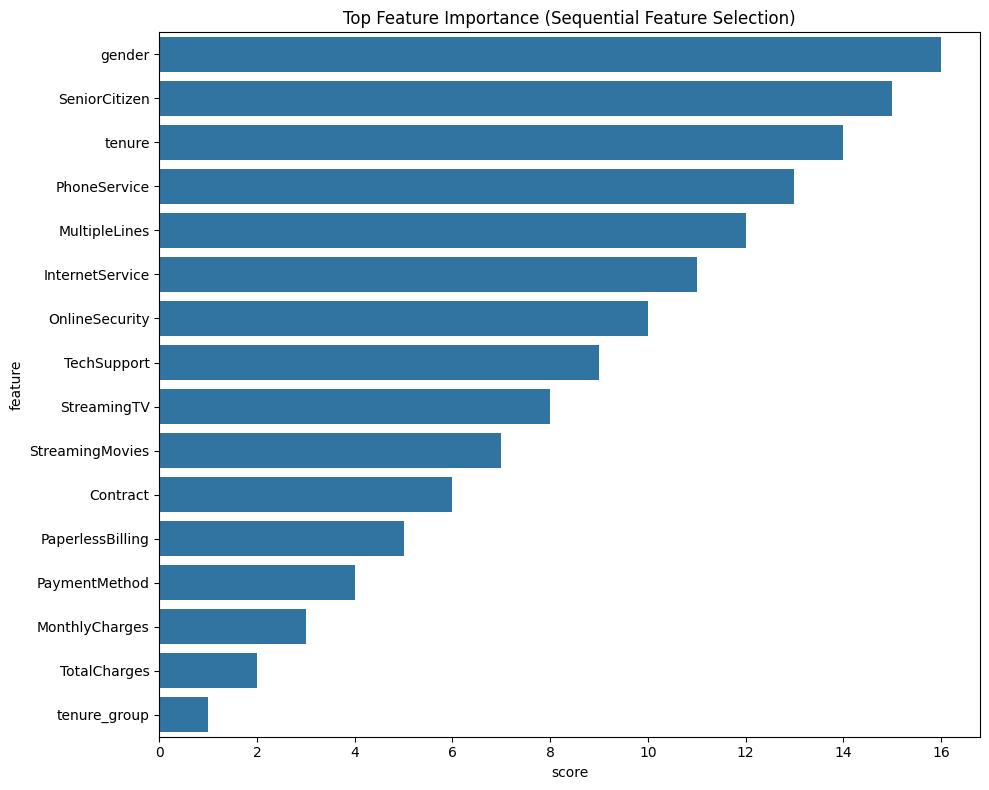

Selected features: ['gender', 'SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'tenure_group']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Feature selection function using Sequential Feature Selection (Forward)
def select_features(X, y, n_features=None):
    """Select most important features using Sequential Feature Selection (Forward)"""
    if n_features is None:
        n_features = int(X.shape[1] * 0.8)  # Default to using 80% of features

    print(f"Selecting top {n_features} features using Sequential Feature Selection (Forward)...")

    # Scale features to ensure non-negative values for Naive Bayes
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    # Define base model for feature selection
    nb_model = GaussianNB()

    # Apply Sequential Feature Selection (Forward)
    sfs = SequentialFeatureSelector(
        nb_model,
        n_features_to_select=n_features,
        direction='forward',
        scoring='f1_macro',
        cv=5,
        n_jobs=-1
    )
    sfs.fit(X_scaled, y)

    # Get selected features
    selected_mask = sfs.get_support()
    top_features = X.columns[selected_mask].tolist()

    # Compute feature importance scores (using a simple ranking based on selection order)
    feature_scores = pd.DataFrame({
        'feature': top_features,
        'score': range(len(top_features), 0, -1)  # Higher rank for earlier selected features
    })
    feature_scores = feature_scores.sort_values('score', ascending=False)

    # Plot feature scores
    plt.figure(figsize=(10, 8))
    sns.barplot(x='score', y='feature', data=feature_scores)
    plt.title('Top Feature Importance (Sequential Feature Selection)')
    plt.tight_layout()
    plt.savefig('plots/feature_importance_sfs.png')
    plt.show()
    plt.close()

    # Select top features
    X_selected = X[top_features]
    print(f"Selected features: {top_features}")
    return X_selected, top_features

# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Feature selection
X_selected, selected_features = select_features(X, y, n_features=int(X.shape[1] * 0.8))

### Part 3: Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

### Part 4: Data Augmentation

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Function to handle class imbalance
def balance_data(X, y, method='smote'):
    """Balance dataset using SMOTE"""
    print(f"Balancing data using {method}...")
    sampler = SMOTE(random_state=RANDOM_STATE)
    X_balanced, y_balanced = sampler.fit_resample(X, y)
    print(f"Original class distribution: {pd.Series(y).value_counts().to_dict()}")
    print(f"Balanced class distribution: {pd.Series(y_balanced).value_counts().to_dict()}")
    return X_balanced, y_balanced

# Balance only the training data
X_train_balanced, y_train_balanced = balance_data(X_train, y_train, method='smote')

Balancing data using smote...
Original class distribution: {0: 4139, 1: 1495}
Balanced class distribution: {0: 4139, 1: 4139}


### Part 5: Save Selected Features

In [ ]:
import pickle

# Save selected features
with open('models/NB_SFS_selected_features.pkl', 'wb') as f:
    pickle.dump(selected_features, f)

### Part 6: Model Training

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Define Naive Bayes model
nb_model = GaussianNB()

# Define parameter grid for var_smoothing
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Perform grid search
grid_search = GridSearchCV(
    nb_model, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1
)
print("\n--- Training Naive Bayes Model with Grid Search ---")
grid_search.fit(X_train_balanced, y_train_balanced)

# Best model
nb_model = grid_search.best_estimator_
print(f"Best var_smoothing: {grid_search.best_params_['var_smoothing']}")
print(f"Best cross-validation F1-macro score: {grid_search.best_score_:.4f}")


--- Training Naive Bayes Model with Grid Search ---
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best var_smoothing: 1e-09
Best cross-validation F1-macro score: 0.7497


### Part 7: Model Evaluation and Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Predictions
y_train_pred = nb_model.predict(X_train_balanced)
y_test_pred = nb_model.predict(X_test)
y_test_prob = nb_model.predict_proba(X_test)[:, 1]

# Calculate metrics
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
gap = abs(train_accuracy - test_accuracy)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Print results
print("\nClassification Report for Naive Bayes (Test Set):")
print(classification_report(y_test, y_test_pred))
print(f"Naive Bayes Train Accuracy: {train_accuracy:.4f}")
print(f"Naive Bayes Test Accuracy: {test_accuracy:.4f}")
print(f"Naive Bayes Accuracy Gap also known as Overfitting: {gap:.4f}")
print(f"Naive Bayes ROC AUC: {roc_auc:.4f}")


Classification Report for Naive Bayes (Test Set):
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1035
           1       0.49      0.81      0.61       374

    accuracy                           0.72      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.72      0.74      1409

Naive Bayes Train Accuracy: 0.7502
Naive Bayes Test Accuracy: 0.7239
Naive Bayes Accuracy Gap also known as Overfitting: 0.0263
Naive Bayes ROC AUC: 0.8260


### Part 8: Visualization

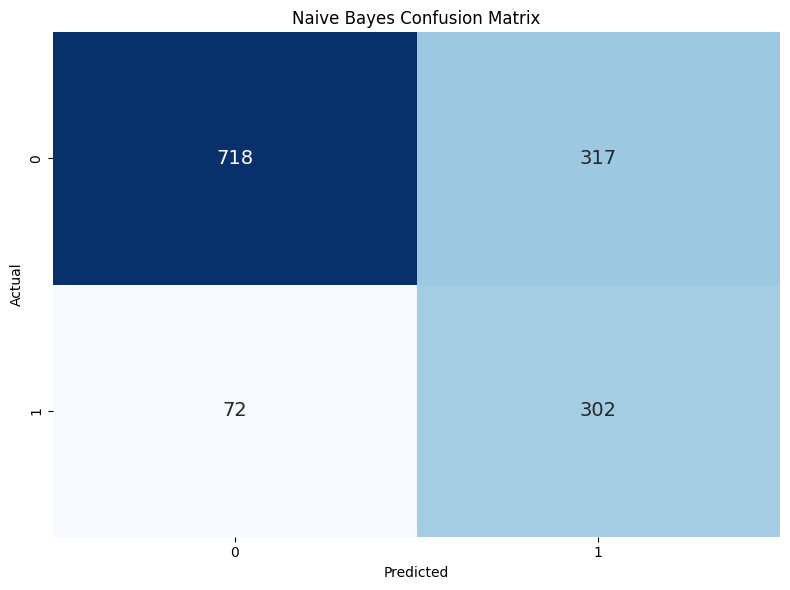

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('plots/NB_SFS_confusion_matrix.png')
plt.show()
plt.close()

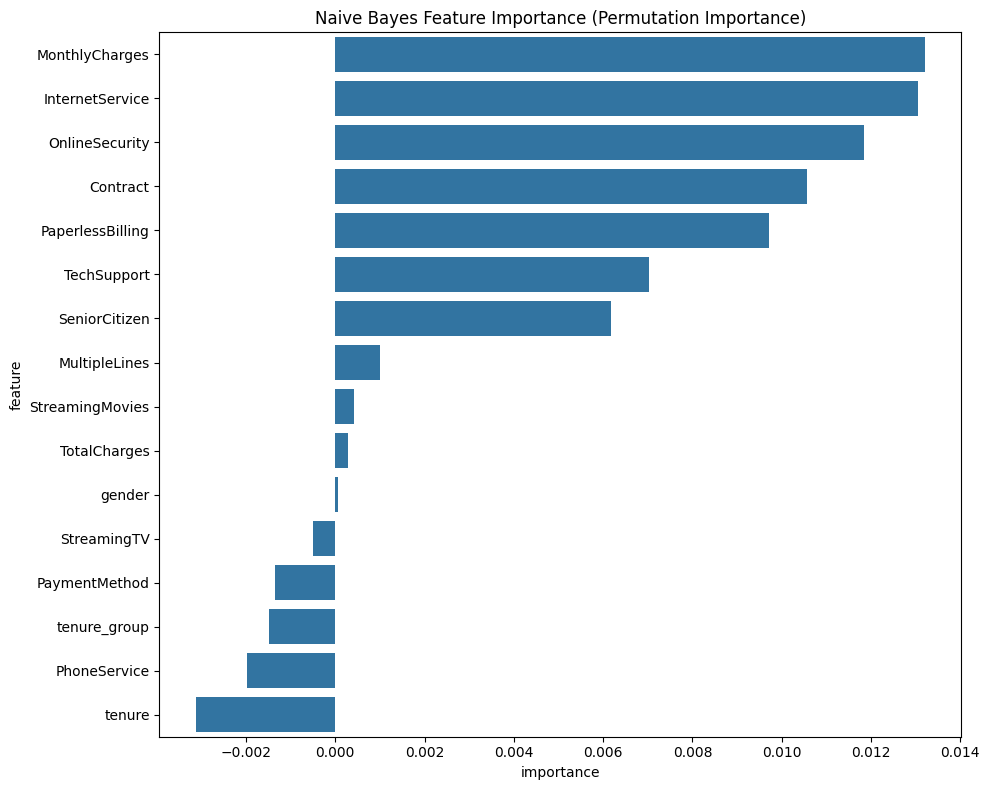

In [ ]:
# Compute permutation importance
perm_importance = permutation_importance(nb_model, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE)
feature_importance = pd.DataFrame({
    'feature': X_selected.columns,
    'importance': perm_importance.importances_mean
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(len(selected_features)))
plt.title('Naive Bayes Feature Importance (Permutation Importance)')
plt.tight_layout()
plt.savefig('plots/NB_SFS_feature_importance.png')
plt.show()
plt.close()

### Part 9: Error Analysis

In [ ]:
# Part 9: Error Analysis with LIME

import pandas as pd
from tabulate import tabulate
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import seaborn as sns

# Part 9.1: Create Results DataFrame
print("\n--- Part 9.1: Results DataFrame Created ---")
results_nb = X_test.copy()
results_nb['True Label'] = y_test.map({0: 'No Churn', 1: 'Churn'})
results_nb['Predicted Label'] = y_test_pred
results_nb['Predicted Label'] = results_nb['Predicted Label'].map({0: 'No Churn', 1: 'Churn'})
results_nb['Correct'] = results_nb['True Label'] == results_nb['Predicted Label']

print(f"Total samples: {len(results_nb)}")
print(f"Correct predictions: {results_nb['Correct'].sum()}")
print(f"Incorrect predictions: {len(results_nb) - results_nb['Correct'].sum()}")


--- Part 9.1: Results DataFrame Created ---
Total samples: 1409
Correct predictions: 1020
Incorrect predictions: 389


In [ ]:
# Part 9.2: Sample Correct and Incorrect Predictions
display_columns = X_test.columns.tolist()

# Sample correct predictions
correct_nb = results_nb[results_nb['Correct']].sample(
    min(5, len(results_nb[results_nb['Correct']])),
    random_state=RANDOM_STATE
)[display_columns + ['True Label', 'Predicted Label']]

# Sample incorrect predictions
incorrect_samples = results_nb[~results_nb['Correct']]
if len(incorrect_samples) == 0:
    print("\n--- Part 9.2: Sampling Correct and Incorrect Predictions ---")
    print("No incorrect predictions found for Naive Bayes. All test samples were classified correctly.")
    incorrect_nb = pd.DataFrame(columns=display_columns + ['True Label', 'Predicted Label'])
else:
    sample_size = min(10, len(incorrect_samples))
    incorrect_nb = incorrect_samples.sample(
        sample_size, random_state=RANDOM_STATE
    )[display_columns + ['True Label', 'Predicted Label']]

In [ ]:
# Display samples
print("\n--- Correct Predictions Sample ---")
correct_nb


--- Correct Predictions Sample ---


gender  SeniorCitizen    tenure  PhoneService  MultipleLines  \
3836       0              0  0.888889             1              2   
4871       1              0  0.805556             1              0   
469        0              0  0.180556             1              0   
880        1              0  0.138889             1              0   
3711       0              0  0.763889             1              2   

      InternetService  OnlineSecurity  TechSupport  StreamingTV  \
3836                0               0            2            0   
4871                0               0            2            2   
469                 0               0            0            0   
880                 1               2            2            2   
3711                0               2            2            0   

      StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
3836                0         1                 0              0   
4871                2         1                 1              1   
469                 2         0                 0              2   
880                 2         0                 1              2   
3711                2         1                 1              0   

      MonthlyCharges  TotalCharges  tenure_group True Label Predicted Label  
3836        0.399005      0.431300             0   No Churn        No Churn  
4871        0.566667      0.494115             0   No Churn        No Churn  
469         0.375124      0.082570             1      Churn           Churn  
880         0.913930      0.118221             2      Churn           Churn  
3711        0.572139      0.489897             0   No Churn        No Churn

In [ ]:
print("\n--- Incorrect Predictions Sample ---")
incorrect_nb


--- Incorrect Predictions Sample ---


gender  SeniorCitizen    tenure  PhoneService  MultipleLines  \
6184       1              0  0.569444             1              2   
2590       0              1  0.347222             1              0   
2015       0              0  0.388889             1              2   
4571       0              0  0.277778             1              0   
1296       0              1  0.277778             1              0   
1829       1              0  0.111111             1              2   
1351       1              0  0.152778             1              0   
110        1              0  0.763889             1              2   
2792       0              0  0.208333             1              0   
1388       0              0  0.166667             1              0   

      InternetService  OnlineSecurity  TechSupport  StreamingTV  \
6184                0               0            0            0   
2590                1               0            0            0   
2015                0               0            0            0   
4571                1               0            0            0   
1296                1               0            0            2   
1829                1               0            0            0   
1351                2               1            1            1   
110                 1               2            0            2   
2792                0               0            0            0   
1388                0               0            0            2   

      StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
6184                0         0                 1              0   
2590                2         0                 0              0   
2015                0         0                 0              3   
4571                0         0                 1              0   
1296                0         0                 0              0   
1829                0         0                 1              2   
1351                1         0                 1              2   
110                 0         0                 1              2   
2792                0         0                 0              2   
1388                0         0                 1              1   

      MonthlyCharges  TotalCharges  tenure_group True Label Predicted Label  
6184        0.372637      0.256029             1   No Churn           Churn  
2590        0.698010      0.250675             1   No Churn           Churn  
2015        0.314925      0.160564             1   No Churn           Churn  
4571        0.512935      0.175577             1   No Churn           Churn  
1296        0.621393      0.184099             1   No Churn           Churn  
1829        0.563184      0.063888             2   No Churn           Churn  
1351        0.021891      0.026771             2   No Churn           Churn  
110         0.781095      0.602366             0      Churn        No Churn  
2792        0.304478      0.082853             1   No Churn           Churn  
1388        0.399005      0.083285             2   No Churn           Churn

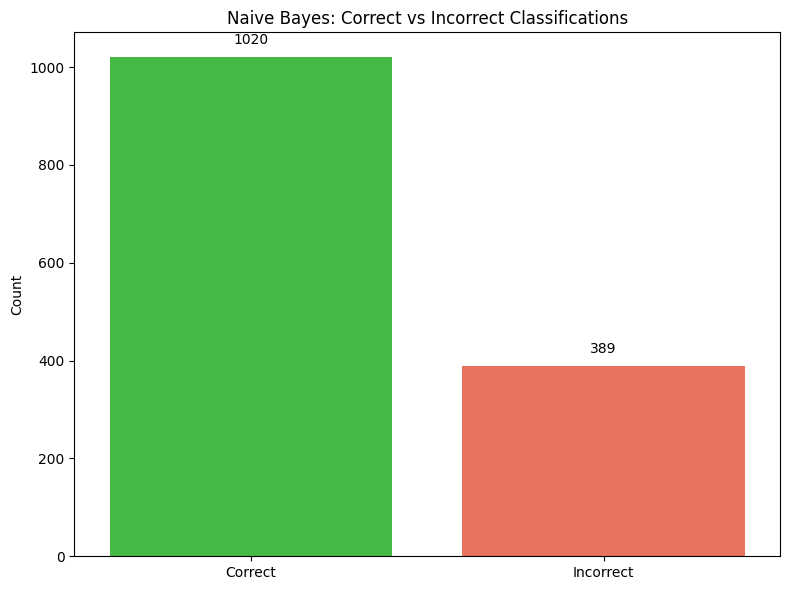


--- Part 9.3: Visualization Complete ---
Bar chart saved to 'plots/NB_SFS_correct_vs_incorrect.png'


In [ ]:
# Part 9.3: Visualize Correct vs. Incorrect Predictions
correct_count_nb = results_nb['Correct'].sum()
incorrect_count_nb = len(results_nb) - correct_count_nb

# Plot bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=['Correct', 'Incorrect'], y=[correct_count_nb, incorrect_count_nb], palette=['#32CD32', '#FF6347'])
plt.title('Naive Bayes: Correct vs Incorrect Classifications')
plt.ylabel('Count')
for i, count in enumerate([correct_count_nb, incorrect_count_nb]):
    plt.text(i, count + 0.02 * max(correct_count_nb, incorrect_count_nb), str(count), ha='center', va='bottom')
plt.tight_layout()
plt.savefig('plots/NB_SFS_correct_vs_incorrect.png')
plt.show()
plt.close()

print("\n--- Part 9.3: Visualization Complete ---")
print("Bar chart saved to 'plots/NB_SFS_correct_vs_incorrect.png'")

In [ ]:
# Part 9.4: LIME Explanations
# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_balanced.values,
    feature_names=X_train_balanced.columns.tolist(),
    class_names=['No Churn', 'Churn'],
    mode='classification',
    random_state=RANDOM_STATE
)

# Function to generate LIME explanation
def explain_instance(instance, model, explainer, num_features=5):
    """Generate LIME explanation for a single instance"""
    exp = explainer.explain_instance(
        data_row=instance,
        predict_fn=model.predict_proba,
        num_features=num_features
    )
    return exp

In [ ]:
print("\n--- Part 9.4: LIME Explanations ---")
if not correct_nb.empty:
    print("\nLIME Explanation for a Correct Prediction:")
    correct_instance = correct_nb.iloc[0][display_columns].values
    correct_exp = explain_instance(correct_instance, nb_model, explainer)
    correct_exp.save_to_file('plots/NB_SFS_lime_correct.html')
    print("LIME explanation for correct prediction saved to 'plots/NB_SFS_lime_correct.html'")

    # Convert LIME explanation to a table
    explanation_list = correct_exp.as_list()
    explanation_df = pd.DataFrame(explanation_list, columns=['Feature', 'Weight'])

    # Display the table using tabulate
    print("\nLIME Explanation Table:")
    print(tabulate(explanation_df, headers='keys', tablefmt='psql', showindex=False))
else:
    print("\nNo correct predictions to explain with LIME.")


--- Part 9.4: LIME Explanations ---

LIME Explanation for a Correct Prediction:
LIME explanation for correct prediction saved to 'plots/NB_SFS_lime_correct.html'

LIME Explanation Table:
+-------------------------+-----------+
| Feature                 |    Weight |
|-------------------------+-----------|
| 0.00 < Contract <= 1.00 | -0.31167  |
| tenure > 0.68           | -0.227807 |
| TechSupport > 1.00      | -0.185128 |
| TotalCharges > 0.39     | -0.167382 |
| OnlineSecurity <= 0.00  |  0.152146 |
+-------------------------+-----------+


In [ ]:
if not incorrect_nb.empty:
    print("\nLIME Explanation for an Incorrect Prediction:")
    incorrect_instance = incorrect_nb.iloc[0][display_columns].values
    incorrect_exp = explain_instance(incorrect_instance, nb_model, explainer)
    incorrect_exp.save_to_file('plots/NB_SFS_lime_incorrect.html')
    print("LIME explanation for incorrect prediction saved to 'plots/NB_SFS_lime_incorrect.html'")

    # Convert LIME explanation to a table
    explanation_list = incorrect_exp.as_list()
    explanation_df = pd.DataFrame(explanation_list, columns=['Feature', 'Weight'])

    # Display the table using tabulate
    print("\nLIME Explanation Table:")
    print(tabulate(explanation_df, headers='keys', tablefmt='psql', showindex=False))
else:
    print("\nNo incorrect predictions to explain with LIME.")


LIME Explanation for an Incorrect Prediction:
LIME explanation for incorrect prediction saved to 'plots/NB_SFS_lime_incorrect.html'

LIME Explanation Table:
+---------------------------------+-----------+
| Feature                         |    Weight |
|---------------------------------+-----------|
| Contract <= 0.00                |  0.553236 |
| TechSupport <= 0.00             |  0.161726 |
| OnlineSecurity <= 0.00          |  0.15525  |
| SeniorCitizen <= 0.00           | -0.139815 |
| 0.00 < PaperlessBilling <= 1.00 |  0.104055 |
+---------------------------------+-----------+


### Part 10: Model Saving

In [ ]:
import pickle

# Save the model
model_filename = 'models/Naive_Bayes_SFS_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(nb_model, f)
print(f"Naive Bayes model saved as {model_filename}")

print("\nNaive Bayes model optimization completed successfully!")

Naive Bayes model saved as models/Naive_Bayes_SFS_model.pkl

Naive Bayes model optimization completed successfully!
